# Zomato Restaurants in India

## Introduction
In India, Zomato is one of the <b>biggest platforms</b> for finding restaurants and ordering food online. It began as a restaurant directory in 2008 and has since expanded to include online ordering, table reservations, and food delivery services. Zomato is available in more than 24 countries and has over 1.5 million active restaurants listed on its platform as of 2022.

The Zomato Restaurants in India dataset contains a lot of information about Indian restaurants that are on the Zomato platform. The <b>name, location, type of cuisine, rating, and price range</b> of various restaurants are all included in this dataset. The dataset, which was compiled from publicly available information on the Zomato website and contains information about more than 2,11,000 restaurants in various Indian cities, is a rich resource for examining the restaurant industry in India.

Researchers, data analysts, and food enthusiasts interested in studying India's restaurant industry will find this dataset to be a useful resource. We can comprehend the various factors that influence a restaurant's success, including its location, cuisine type, and pricing strategy, by analyzing this dataset. In addition, the dataset can be utilized to gain an understanding of the preferences and actions of restaurant patrons, such as the types of cuisines they favor and their budgetary ranges.

One of the key features of the dataset is its <b>comprehensive coverage of restaurants</b> in India. Nearly all of the restaurants in Metropolitan Cities (Mumbai, Kolkata, New Delhi, Chennai) and other major cities are included in the dataset, as are those in smaller towns and rural areas. Because of this, it is an excellent resource for investigating the restaurant industry as a whole in India and contrasting the restaurant markets in various regions.

The <b>wide variety of cuisines</b> represented in this dataset is one of its most intriguing features. India is a diverse nation with a rich culinary tradition. The dataset reflects India's diversity with a wide variety of cuisines, including South Indian, North Indian, Chinese, Italian, and Mexican, among others. We can learn about the culinary preferences of various regions by examining the popularity of various cuisines in various Indian cities.

Another important feature of zomato is its <b>rating system</b>. Restaurants are rated by Zomato using a 5-star rating system based on things like service, ambiance, food quality and food delivery. The ratings, which are provided by previous customers of the restaurant, can offer useful insights into the quality of the establishment. The ratings for each restaurant in the dataset can be used to determine which ones are the most well-liked and highly rated in various regions.

Furthermore, the dataset can be used to understand the impact of <b>location</b> on restaurant success. Each restaurant's location, including the city and neighborhood, is included in the dataset. We can learn more about the most popular restaurant locations in various Indian cities and the factors that make them appealing to customers by looking at this data.

The dataset also includes information on the <b>price range</b> of each restaurant. By looking at this data, we can learn more about how successful restaurants set their prices and how price affects and how customers behave. From cheap street food stalls to expensive fine-dining restaurants, the dataset includes a wide range of restaurants.


## Research Questions

1.  What are the most popular types of cuisine in the local area, and how do they compare in terms of customer satisfaction ratings? 

2.  How do prices vary across different types of restaurants, and how does this affect customer satisfaction ratings? 

3.  How do the locations of different restaurants type (causal/ fine dining)? 

4.  What kind of establishment(dhaba, quick bytes, bakery, etc) is highly popular (based or ratings and cuisine) in different cities.

5.  Comparing each city, which localities are more populated with restaurants, and how the timing tends to be for these areas in general w.r.t ratings. 

6.  The cities with highest negative ratings and the cuisine types of these. 

7. 	How do the average ratings of chain restaurants compare to independent restaurants in Chennai.

## Description of Methods

- Several libraries, including NumPy, Pandas, Matplotlib, Seaborn, Folium, Geopandas, and Plotly, are used in this code. Additionally, it imports a number of these libraries' modules and functions, including WordCloud, which is used to generate word clouds. Additionally, the code uses the warnings library to suppress warning messages and set some parameters for Matplotlib.

- info() is useful for getting a quick overview of the dataset and identifying missing or incorrect values that may need to be cleaned or imputed.

- describe() is used to get summary statistics like mean, median, mode, standard deviation, minimum and maximum values for numerical columns.

- format_numbers function is designed to format large numbers into a more readable and abbreviated format. The function takes a number as input and checks whether it is in the billions, millions, thousands or below. It then formats the number accordingly, by dividing it by the appropriate number and adding a letter 'B', 'M', or 'K' to indicate whether the number is in billions, millions or thousands respectively. The format can be customized using the fmt argument, which defaults to '.0f'.

- The first function get_color_codes() takes in a colormap name and a size (number of colors needed), and returns a list of color codes in hex format. The second function get_random_colors() generates random color codes either for a single color or for a specified number of colors. These functions are useful for creating plots with color-coded data points or labels.

- Individual counts of cuisines offered by various restaurants was calculated using value.counts() function. A pie chart was plotted for the total percentage of restaurants in all the cities according to ratings.

- The data by grouping the aggregate rate, rating text and rating count, was done to identify the distribution of rating of restaurants across the country, and was plotted using bar plot with rating higher than 2.5.

- Average restaurant ratings of each city was calculated and plotted using a bar plot, and was displayed in an ascending order. A new array of cities was created with the cities with least ratings. A new dataset was initialised and assigned the rows from the main dataset where the cities are the cities in the array. The variety of cuisines available in these restaurants was found. Among these cities, the cuisines with highest rating was plotted using a pie chart.

- Average ratings of different restaurants in each locality of Chennai was calculated by implementing groupby method and a new column Rating count(total ratings from that locality) was added to the table. The top 5 localities with highest number of restaurants was plotted using a bar plot. The average restaurant ratings for each localities was calculated and plotted.

- How prices vary across different types of restaurants and how this affects customer satisfaction ratings was found with correlation coefficient.
- The average price and average rating for each city is plotted to find the relationship between price and satisfaction rating.

- Restaurants with single and more than one outlets are plotted in a map using folium library.


### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from cmasher import take_cmap_colors
import matplotlib
import matplotlib as mpl
from matplotlib import colors
from matplotlib import ticker as mtick
import seaborn as sns
import random
from wordcloud import WordCloud
import geopandas as gpd
import os  
import mapclassify
import plotly.graph_objs as go
from plotly.offline import iplot
import folium
from matplotlib.cm import ScalarMappable
from folium.plugins import HeatMap
from matplotlib.lines import Line2D
from textwrap import wrap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import warnings
warnings.filterwarnings('ignore') # Change settings so that warnings are not displayed

## Preprocessing and Exploring the data

In [114]:
data = pd.read_csv("zomato_restaurants_in_India.csv")

In [115]:
data.head(5)

res_id                            name      establishment  \
0  3400299                     Bikanervala    ['Quick Bites']   
1  3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2  3401013                   Bhagat Halwai    ['Quick Bites']   
3  3400290                   Bhagat Halwai    ['Quick Bites']   
4  3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   

                                                 url  \
0  https://www.zomato.com/agra/bikanervala-khanda...   
1  https://www.zomato.com/agra/mama-chicken-mama-...   
2  https://www.zomato.com/agra/bhagat-halwai-2-sh...   
3  https://www.zomato.com/agra/bhagat-halwai-civi...   
4  https://www.zomato.com/agra/the-salt-cafe-kitc...   

                                             address  city  city_id  \
0  Kalyani Point, Near Tulsi Cinema, Bypass Road,...  Agra       34   
1        Main Market, Sadar Bazaar, Agra Cantt, Agra  Agra       34   
2  62/1, Near Easy Day, West Shivaji Nagar, Goalp...  Agra       34   
3  Near Anjana Cinema, Nehru Nagar, Civil Lines, ...  Agra       34   
4        1C,3rd Floor, Fatehabad Road, Tajganj, Agra  Agra       34   

      locality   latitude  longitude  ... price_range  currency  \
0     Khandari  27.211450  78.002381  ...           2       Rs.   
1   Agra Cantt  27.160569  78.011583  ...           2       Rs.   
2     Shahganj  27.182938  77.979684  ...           1       Rs.   
3  Civil Lines  27.205668  78.004799  ...           1       Rs.   
4      Tajganj  27.157709  78.052421  ...           3       Rs.   

                                          highlights aggregate_rating  \
0  ['Lunch', 'Takeaway Available', 'Credit Card',...              4.4   
1  ['Delivery', 'No Alcohol Available', 'Dinner',...              4.4   
2  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.2   
3  ['Takeaway Available', 'Credit Card', 'Lunch',...              4.3   
4  ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...              4.9   

  rating_text  votes  photo_count opentable_support delivery  takeaway  
0   Very Good    814          154               0.0       -1        -1  
1   Very Good   1203          161               0.0       -1        -1  
2   Very Good    801          107               0.0        1        -1  
3   Very Good    693          157               0.0        1        -1  
4   Excellent    470          291               0.0        1        -1  

[5 rows x 26 columns]

In [116]:
data.tail(5)

res_id                            name      establishment  \
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
211939  https://www.zomato.com/vadodara/kali-mirch-caf...   
211940  https://www.zomato.com/vadodara/raju-omlet-kar...   
211941  https://www.zomato.com/vadodara/the-grand-thak...   
211942  https://www.zomato.com/vadodara/subway-1-akota...   
211943  https://www.zomato.com/vadodara/freshcos-the-h...   

                                                  address      city  city_id  \
211939  Manu Smriti Complex, Near Navrachna School, GI...  Vadodara       32   
211940  Mahalaxmi Apartment, Opposite B O B, Karoli Ba...  Vadodara       32   
211941  3rd Floor, Shreem Shalini Mall, Opposite Conqu...  Vadodara       32   
211942  G-2, Vedant Platina, Near Cosmos, Akota, Vadodara  Vadodara       32   
211943  Shop 7, Ground Floor, Opposite Natubhai Circle...  Vadodara       32   

          locality   latitude  longitude  ... price_range  currency  \
211939   Fatehgunj  22.336931  73.192356  ...           2       Rs.   
211940  Karelibaug  22.322455  73.197203  ...           1       Rs.   
211941    Alkapuri  22.310563  73.171164  ...           2       Rs.   
211942       Akota  22.270027  73.143068  ...           2       Rs.   
211943    Vadiwadi  22.309935  73.158768  ...           2       Rs.   

                                               highlights aggregate_rating  \
211939  ['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...              4.1   
211940  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...              4.1   
211941  ['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...              4.0   
211942  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...              3.7   
211943  ['Dinner', 'Cash', 'Takeaway Available', 'Debi...              4.0   

       rating_text  votes  photo_count opentable_support delivery  takeaway  
211939   Very Good    243           40               0.0       -1        -1  
211940   Very Good    187           40               0.0        1        -1  
211941   Very Good    111           38               0.0       -1        -1  
211942        Good    128           34               0.0        1        -1  
211943   Very Good     93           53               0.0        1        -1  

[5 rows x 26 columns]

In [117]:
# Data dimensions
print('Data shape:')
print('No of rows:', (data.shape[0]))
print('No of columns:', data.shape[1])

Data shape:
No of rows: 211944
No of columns: 26


This can help give an initial idea of the size of the dataset and the amount of information available for analysis. This dataset has more than 2 lakh rows with 26 features. 

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

We have many interesting features which can be great for analysis and also some which we will omit. The difference in count of some features gives us hint of some missing values. 
While <b>info( )</b> is used to know about count, null and type properties, <b>describe( )</b> gives us statistical information about numerical data.

In [119]:
data.describe()

res_id        city_id       latitude      longitude  country_id  \
count  2.119440e+05  211944.000000  211944.000000  211944.000000    211944.0   
mean   1.349411e+07    4746.785434      21.499758      77.615276         1.0   
std    7.883722e+06    5568.766386      22.781331       7.500104         0.0   
min    5.000000e+01       1.000000       0.000000       0.000000         1.0   
25%    3.301027e+06      11.000000      15.496071      74.877961         1.0   
50%    1.869573e+07      34.000000      22.514494      77.425971         1.0   
75%    1.881297e+07   11306.000000      26.841667      80.219323         1.0   
max    1.915979e+07   11354.000000   10000.000000      91.832769         1.0   

       average_cost_for_two    price_range  aggregate_rating          votes  \
count         211944.000000  211944.000000     211944.000000  211944.000000   
mean             595.812229       1.882535          3.395937     378.001864   
std              606.239363       0.892989          1.283642     925.333370   
min                0.000000       1.000000          0.000000     -18.000000   
25%              250.000000       1.000000          3.300000      16.000000   
50%              400.000000       2.000000          3.800000     100.000000   
75%              700.000000       2.000000          4.100000     362.000000   
max            30000.000000       4.000000          4.900000   42539.000000   

         photo_count  opentable_support       delivery  takeaway  
count  211944.000000           211896.0  211944.000000  211944.0  
mean      256.971224                0.0      -0.255907      -1.0  
std       867.668940                0.0       0.964172       0.0  
min         0.000000                0.0      -1.000000      -1.0  
25%         3.000000                0.0      -1.000000      -1.0  
50%        18.000000                0.0      -1.000000      -1.0  
75%       128.000000                0.0       1.000000      -1.0  
max     17702.000000                0.0       1.000000      -1.0

 we can obtain a summary of the statistical information for all the numeric columns in the 'data' dataframe. This can include information about the ratings and cost of the restaurants in the dataset, among other variables. This summary can help us gain insights into the distribution and range of values for each numeric variable in the dataset.

In [120]:
# To transform numbers to abbreviated format
def format_numbers(number, pos=None, fmt= '.0f'):
    fmt= '%'+fmt
    thousands, millions, billions= 1_000, 1_000_000, 1_000_000_000
    if number/billions >=1:
        return (fmt+'B') %(number/billions)
    elif number/millions >=1:
        return (fmt+'M') %(number/millions)
    elif number/thousands >=1:
        return (fmt+'K') %(number/thousands)
    else:
        return fmt %(number)

In [2]:
# Function for getting color codes
def get_color_codes(name, size):
  return take_cmap_colors(name, size, return_fmt='hex')

# Function for random colors codes
def get_random_colors(n=1):
  if n==1:
    return get_color_codes(name= random.choice(plt.colormaps()), size=n)[0]
  else:
    return get_color_codes(name= random.choice(plt.colormaps()), size= n)

In [3]:
# Find whether x has any value, which matches in list of given values
def includes(x, list_of_values):
    result= []
    for i in x:
        if i in list_of_values:
            result.append(True)
        else:
            result.append(False)
    return result

In [121]:
# to assert whether duplicate records present in the data and get summary of duplicated records
def has_duplicates(data):
    n_duplicates= data.duplicated().sum()
    if n_duplicates > 0:
        print('This dataset contains almost {} ({:.1%}) duplicate records.'.format(format_numbers(n_duplicates), n_duplicates/data.shape[0]))
    else:
        print('No duplicate records found.')

In [122]:
# finding out if there are any duplicate records in the dataset
has_duplicates(data)

This dataset contains almost 152K (71.5%) duplicate records.


### Removing duplicates
Since res_id is unique identifier of our restaurants, it is used to remove duplicates.

In [123]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape

(55568, 26)

Even though we are left with 1/4th of our original dataset, about 55000+ restaurants is still good enough to perform analysis.


### Dealing with missing values
let's see how many variables have missing values.

In [124]:
data.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

We have 5 variables with some kind of missing values. 
Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.



In [125]:
#import os
#os.makedirs("C:/Users/User/Music/Data Analytics Project", exist_ok=True)  
#data.to_csv('C:/Users/User/Music/Data Analytics Project/newout.csv') 

Since the dataset has more missing values, a new dataset is created from the existing dataset which is named as newout.csv

In [126]:
n = pd.read_csv("newout.csv")

### Omitting Unwanted features
We will look at each feature and decide to consider them for our analysis or not
1. <b>res_id</b> - Unique ID for each restaurant (Useful)

In [127]:
print(data["res_id"].nunique())
print(data["res_id"].unique())

55568
[ 3400299  3400005  3401013 ... 18019952  3200996  3201138]


2. <b>name</b> - Name can be used to find top restaurants (Useful)


In [128]:
print(data["name"].nunique())
print(data["name"].unique())

41100
['Bikanervala' 'Mama Chicken Mama Franky House' 'Bhagat Halwai' ...
 'Red China' 'Wah Ustad' 'Geeta lodge']


We have more than 50k observations for res_id, but we have only 41k observations for restaurant names. Which means that, those restaurants are chain of restaurants or otherwise restaurants with more than 1 outlet.

3. <b>establishment</b> - Let's see what type of values we have in establishment (Useful)

In [129]:
print(data["establishment"].nunique())
print((data["establishment"].unique()))

27
["['Quick Bites']" "['Casual Dining']" "['Bakery']" "['Café']" "['Dhaba']"
 "['Bhojanalya']" "['Bar']" "['Sweet Shop']" "['Fine Dining']"
 "['Food Truck']" "['Dessert Parlour']" "['Lounge']" "['Pub']"
 "['Beverage Shop']" "['Kiosk']" "['Paan Shop']" "['Confectionery']" '[]'
 "['Shack']" "['Club']" "['Food Court']" "['Mess']" "['Butcher Shop']"
 "['Microbrewery']" "['Cocktail Bar']" "['Pop up']" "['Irani Cafe']"]


Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with <b>apply( )</b> function.
Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.

In [130]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


4. <b>url</b> - It is the link to restaurant's page which is not useful for us
5. <b>address</b> - Not useful since it has long strings and its difficult to classify
6. <b>city</b> - Let's check unique cities (Useful)

In [131]:
print('The dataset contains data of {} restaurants from {} major cities of India.'.format(format_numbers(data.res_id.count()), data.city.nunique()))

The dataset contains data of 56K restaurants from 99 major cities of India.


In [132]:
print(f'\033[1m{data.city.nunique()} Cities names:')
print(data.city.unique())

99 Cities names:
['Agra' 'Ahmedabad' 'Gandhinagar' 'Ajmer' 'Alappuzha' 'Allahabad'
 'Amravati' 'Amritsar' 'Aurangabad' 'Bangalore' 'Bhopal' 'Bhubaneshwar'
 'Chandigarh' 'Mohali' 'Panchkula' 'Zirakpur' 'Nayagaon' 'Chennai'
 'Coimbatore' 'Cuttack' 'Darjeeling' 'Dehradun' 'New Delhi' 'Gurgaon'
 'Noida' 'Faridabad' 'Ghaziabad' 'Greater Noida' 'Dharamshala' 'Gangtok'
 'Goa' 'Gorakhpur' 'Guntur' 'Guwahati' 'Gwalior' 'Haridwar' 'Hyderabad'
 'Secunderabad' 'Indore' 'Jabalpur' 'Jaipur' 'Jalandhar' 'Jammu'
 'Jamnagar' 'Jamshedpur' 'Jhansi' 'Jodhpur' 'Junagadh' 'Kanpur'
 'Kharagpur' 'Kochi' 'Kolhapur' 'Kolkata' 'Howrah' 'Kota' 'Lucknow'
 'Ludhiana' 'Madurai' 'Manali' 'Mangalore' 'Manipal' 'Udupi' 'Meerut'
 'Mumbai' 'Thane' 'Navi Mumbai' 'Mussoorie' 'Mysore' 'Nagpur' 'Nainital'
 'Nasik' 'Nashik' 'Neemrana' 'Ooty' 'Palakkad' 'Patiala' 'Patna'
 'Puducherry' 'Pune' 'Pushkar' 'Raipur' 'Rajkot' 'Ranchi' 'Rishikesh'
 'Salem' 'Shimla' 'Siliguri' 'Srinagar' 'Surat' 'Thrissur' 'Tirupati'
 'Trichy' 'Trivand

7. <b>city_id</b> - We can use city name instead of id. So one feature is enough. (Not Useful)
8. <b>locality</b> - Let's see number of unique values (Useful)

In [133]:
print(f'\033[1m{data.locality.nunique()} Localities names:')
print(data.locality.unique())

3731 Localities names:
['Khandari' 'Agra Cantt' 'Shahganj' ... 'Navapura' 'L&T Knowledge City'
 'Danteshwar']



9. <b>latitude</b> - It is useful for plotting maps (Useful)

10. <b>longitude</b> - It is useful for plotting maps (Useful)
11. <b>zipcode</b> - It has more missing values in this dataset (Not Useful)
12. <b>country_id</b> - Since this dataset is for Indian restaurants, there should be just one unique id here (Not Useful) 

In [134]:
data["country_id"].nunique()

1

13. <b>locality_verbose</b> - Same as locality (Useful)

In [135]:
print(f'\033[1m{data.locality_verbose.nunique()} locality_verbose names:')
print(data.locality_verbose.unique())

3910 locality_verbose names:
['Khandari, Agra' 'Agra Cantt, Agra' 'Shahganj, Agra' ...
 'Navapura, Vadodara' 'L&T Knowledge City, Vadodara'
 'Danteshwar, Vadodara']


14. <b>cuisines</b> - This feature has some missing values. Even though this has 9382 unique classes, we can see that each restaurant has a list of cusinies and the composition of the list is the reason why we have so many different cuisine classes. Let's check actual number of unique cuisine classes. But first we need to replace null values with a label. (Useful)

In [136]:
print(f'\033[1m{data.cuisines.nunique()} Cuisines names:')
print(data.cuisines.unique())

9382 Cuisines names:
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [137]:
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [138]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())
print(cuisines.unique())


Total number of unique cuisines =  134
['North Indian' 'South Indian' 'Mithai' 'Street Food' 'Desserts' 'Mughlai'
 'Rolls' 'Chinese' 'Fast Food' 'Bakery' 'Continental' 'Italian' 'Pizza'
 'Cafe' 'Burger' 'Wraps' 'Beverages' 'Rajasthani' 'Mexican' 'Healthy Food'
 'Sandwich' 'Salad' 'Momos' 'Lebanese' 'Mediterranean' 'Thai' 'Gujarati'
 'Indian' 'Finger Food' 'European' 'Tea' 'Asian' 'Bar Food' 'Kebab' 'Paan'
 'Biryani' 'Juices' 'Ice Cream' 'Japanese' 'Korean' 'Afghan' 'Awadhi'
 'No cuisine' 'Hyderabadi' 'Lucknowi' 'Roast Chicken' 'Drinks Only'
 'Coffee' 'American' 'BBQ' 'Maharashtrian' 'Modern Indian' 'Andhra'
 'Konkan' 'Kerala' 'Sushi' 'Parsi' 'Greek' 'Bengali' 'Seafood'
 'Frozen Yogurt' 'Arabian' 'Indonesian' 'Sindhi' 'Hot dogs' 'Goan'
 'Charcoal Chicken' 'Raw Meats' 'Grill' 'Malwani' 'Cantonese' 'Pakistani'
 'Steak' 'Vietnamese' 'Singaporean' 'Middle Eastern' 'British' 'French'
 'Burmese' 'Kashmiri' 'Mangalorean' 'Malaysian' 'Tex-Mex' 'Spanish'
 'Chettinad' 'Tibetan' 'German' 'Belgian'

15. <b>timings</b> - This also has missing data. And it is not in any defined format. So it is not possible to use this. (Not Useful)

In [139]:
print(data["timings"].nunique())
print(data["timings"].unique())

7740
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']


16. <b>average_cost_for_two</b> - This is an interesting feature for our analysis, although the value "0" is strange and could be an outlier (Useful)

In [140]:
print(data["average_cost_for_two"].nunique())
print(data["average_cost_for_two"].unique())

145
[  700   600   300  1000   400   500  1200  1600   250   200   150  1500
   800   450   850   350   900  6000   650   550  2500  6500  5500  4300
  3600  3500  3200  3000  2800  2000  1800  1400  1300  1250  1150  1100
  1050    50    60   100   750     0   220   260   950  1900  2400  2300
  2200  1700  1230    70   140   120   470    20    40   110    80    90
   440  2100 14000  5000  4500  4100  4000  3700  3400  2700  2600  1650
  1350   180  1260     2   197   312   170   240   330  3100  4200  1850
  3300  4800  3800  3250  2900  1750   282    35   149  1550  5100  6600
  1450   160  2250  8000  7000  3900  3650  1020   320   360   280   130
 15000  2501    30  1950  1875  1190   309 12000   380   299    45   190
  4600   880    75   620   999 10000   505 30000  4050   175   404   445
   640    15   420   115   444   592  1499   208   940   125  7500   520
   294]


17. <b>price_range</b> - Average prices automatically characterized into bins (Useful)

In [141]:

print(data["price_range"].nunique())
print(data["price_range"].unique())

4
[2 1 3 4]


18. <b>currency</b> - It's not useful since the currency is only in Rupees

In [142]:
print(data["currency"].nunique())

1


19. <b>highlights</b> - They represent certain features that the restaurant specializes in and wants to highlight to their customers. Each restaurant has a list of highlights which makes the composition different for each one. We can, filter this and find total unique highlights from all restaurants.

In [143]:
print(data["highlights"].nunique())
print(data["highlights"].unique())

31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned', 'Outdoor Seating', 'Digital Payments Accepted', 'Catering Available', 'Pure Veg']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Debit Card', 'Delivery', 'Credit Card', 'Free Parking', 'Outdoor Seating']"]


In [144]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())
print("\n",hl.unique())

Total number of unique highlights =  104

 ['Lunch' 'Takeaway Available' 'Credit Card' 'Dinner' 'Cash'
 'Air Conditioned' 'Indoor Seating' 'Pure Veg' 'Delivery'
 'No Alcohol Available' 'Breakfast' 'Outdoor Seating' 'Self Service'
 'Digital Payments Accepted' 'Desserts and Bakes' 'Smoking Area'
 'Dance Floor' 'Serves Alcohol' 'Debit Card' 'Wine' 'Live Music' 'Rooftop'
 'Live Sports Screening' 'Fullbar' 'Beer' 'Serves Cocktails'
 'Table booking recommended' 'Available for Functions' 'Resto Bar'
 'Hookah' 'Wifi' 'DJ' 'Live Entertainment' 'City View' 'Free Parking'
 'Free Wifi' 'Table booking not available'
 'Table Reservation Not Required' 'Axis Bank - Dining Delights'
 'No Seating Available' 'Buffet' 'Serves Jain Food' 'Poolside'
 'Table reservation required' 'Restricted Entry' 'Valet Parking Available'
 'Sodexo' '4/5 Star' 'Karaoke' 'Kid Friendly'
 'Private Dining Area Available' 'Nightlife' 'Gluten Free Options'
 'Luxury Dining' 'Wheelchair Accessible' 'Above 18 Only'
 'Pre-Ordering Re

20. <b>aggregate_rating</b> - Rating given to the restaurant (Useful)


21. <b>rating_text</b> - Characterisation of numeric rating into bins by using labels. (Useful)


In [145]:
print(data["rating_text"].nunique())
print(data["rating_text"].unique())

33
['Very Good' 'Excellent' 'Good' 'Average' 'Not rated' 'Poor'
 'Bardzo dobrze' 'Muito Bom' 'İyi' 'Çok iyi' 'Baik' 'Sangat Baik' 'Skvělé'
 'Muy Bueno' 'Průměr' 'Ortalama' 'Skvělá volba' 'Muito bom' 'Velmi dobré'
 'Excelente' 'Bom' 'Scarso' 'Promedio' 'Vynikajúce' 'Bueno' 'Dobré'
 'Terbaik' 'Harika' 'Veľmi dobré' 'Eccellente' 'Buono' 'Média' 'Dobrze']


22. <b>votes</b> - Number of votes contributing to the rating (Useful)
23. <b>photo_count</b> - Photo uploads in reviews (Not Useful)

Let's check the mean and range of above features

In [146]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

aggregate_rating         votes  photo_count
mean          2.958593    223.330352    160.97477
min           0.000000    -18.000000      0.00000
max           4.900000  42539.000000  17702.00000

Rating ranges between 0 and 5 while 42539 are the maximum votes given to a restaurant. The negative value in votes might be an outlier.

24. <b>opentable_support</b> - Not useful since no restaurant has True value for this (Not Useful)


In [147]:
data["opentable_support"].unique()

array([ 0., nan])

25. <b>delivery</b> - This feature has 3 classes but there is no explanation for those classes. We can ignore this feature for now


In [148]:
data["delivery"].unique()

array([-1,  1,  0], dtype=int64)

26. <b>takeaway</b> - Not useful since it only has one class

In [149]:
data["takeaway"].unique()

array([-1], dtype=int64)

## Restaurants with overall ratings more than 4.5

In [150]:
# Top Restaurants with overall ratings over 4.5:
filters=  (data.aggregate_rating >= 4.5)
data[filters][['name', 'establishment','city','locality','average_cost_for_two','aggregate_rating']].drop_duplicates().reset_index(drop=True)

name  establishment      city     locality  \
0     The Salt Cafe Kitchen & Bar  Casual Dining      Agra      Tajganj   
1                  Pinch Of Spice  Casual Dining      Agra  Civil Lines   
2                  Pinch Of Spice  Casual Dining      Agra      Tajganj   
3                  Kiskey Whiskey            Bar      Agra  Civil Lines   
4          Cafe Turquoise Cottage  Casual Dining      Agra      Tajganj   
...                           ...            ...       ...          ...   
1616               Juvenas Bakery         Bakery  Vadodara     Vadiwadi   
1617                Infi Pizzeria    Quick Bites  Vadodara    Manjalpur   
1618      Santushti Shakes & More  Beverage Shop  Vadodara   Sayajipura   
1619       The Belgian Waffle Co.    Quick Bites  Vadodara     Vadiwadi   
1620           L'amour Patisserie         Bakery  Vadodara     Vadiwadi   

      average_cost_for_two  aggregate_rating  
0                     1000               4.9  
1                     1600               4.6  
2                     1600               4.6  
3                      700               4.5  
4                     1600               4.6  
...                    ...               ...  
1616                   400               4.7  
1617                   400               4.7  
1618                   300               4.6  
1619                   300               4.5  
1620                   400               4.5  

[1621 rows x 6 columns]

There are around 1621 restaurants in the dataset with ratings >= 4.5

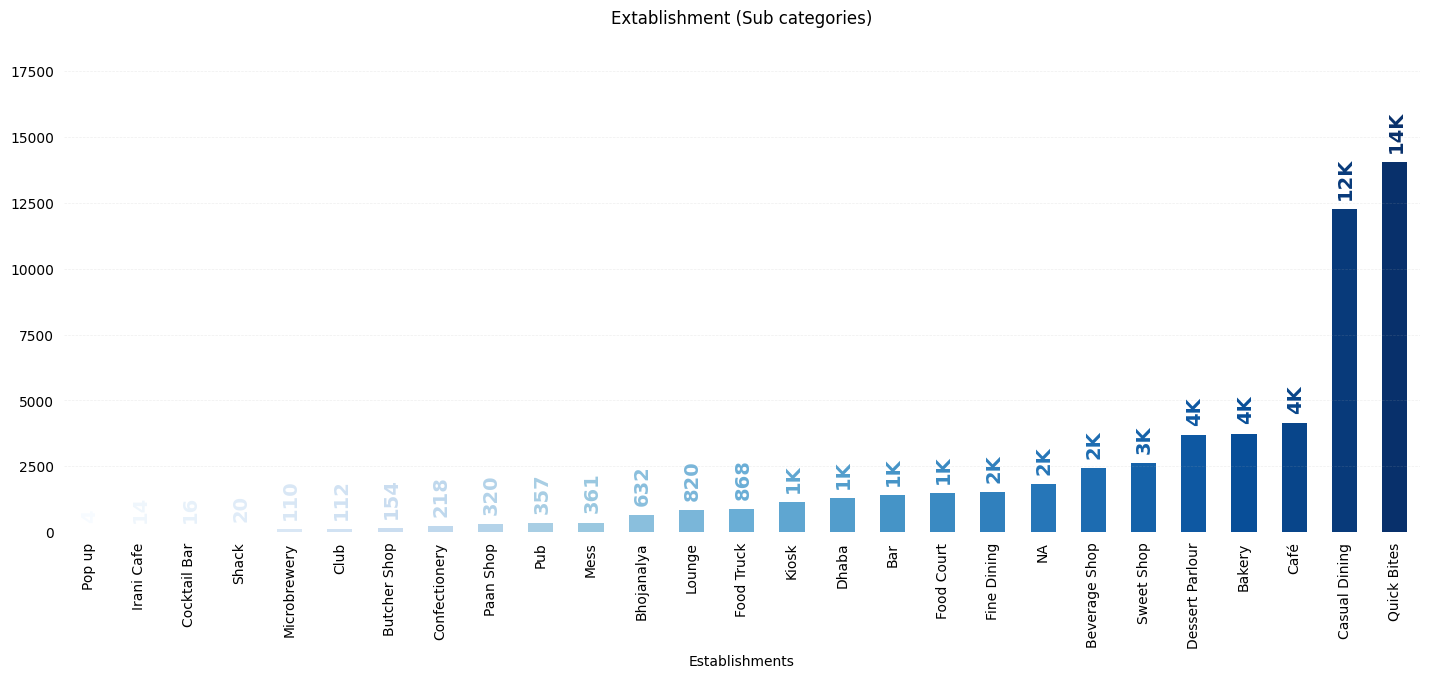

In [152]:
colors= get_color_codes('Blues', len(set(data.establishment)))
data.establishment.value_counts().sort_values().plot(kind='bar', figsize= (17.5,6.5), color= colors)
plt.grid(axis='y', lw=0.5, alpha=0.2, ls='--')
plt.ylim(0,19000)
plt.title('Establishments of Zomato restaurants')
for i, rect in enumerate(plt.gca().patches):
    plt.annotate(xy= (rect.get_x(), rect.get_height()),xytext= (3,10),textcoords= 'offset points',
             text= format_numbers(rect.get_height(), fmt='.0f'), rotation=90, size=14, weight='bold', color= colors[i])
plt.title('Extablishment (Sub categories)')
plt.xlabel('Establishments')
for spine in plt.gca().spines: plt.gca().spines[spine].set_visible(False)
plt.gca().tick_params(left=False, bottom=False)
plt.show()

It is clear that most of the restaurants in the dataset are under "Quick Bites" category followed by "Casual dinings" category

In [153]:
top_cities= data.city.value_counts()[:10].index.to_list()
top_rest_by_cost= data[data.city.isin(top_cities)].groupby(['city','name','establishment']).agg({'average_cost_for_two':'mean','votes':'mean','aggregate_rating':'mean'}).reset_index()

top_rest_by_cost= top_rest_by_cost[top_rest_by_cost.aggregate_rating >= 4].set_index('average_cost_for_two').groupby(['name','city','establishment']).agg({'votes':'idxmax'}).reset_index()

top_rest_by_cost= top_rest_by_cost.set_index('name').groupby(['city','establishment']).votes.agg(['idxmin','idxmax']).rename({'idxmin':'Cheapest', 'idxmax': 'Costliest'},axis=1)

print('Best cheapest and costliest restaurants in all cities by restaurant type')
top_rest_by_cost

Best cheapest and costliest restaurants in all cities by restaurant type


Cheapest  \
city      establishment                                   
Ahmedabad Bakery                                 Biskut   
          Beverage Shop            Astodia Juice Corner   
          Café                       Danny's Coffee Bar   
          Casual Dining                        La Bella   
          Dessert Parlour             Natural Ice Cream   
...                                                 ...   
Pune      Microbrewery     Independence Brewing Company   
          NA                   Bipin Snacks & Juice Bar   
          Pub                          Aufside @ Hotfut   
          Quick Bites                     Buvachi Misal   
          Sweet Shop                  Budhani Waferwala   

                                                     Costliest  
city      establishment                                         
Ahmedabad Bakery                                   Cake My Day  
          Beverage Shop                                 Joules  
          Café                       Chai Shop - Hyatt Regency  
          Casual Dining         Wind & Water- Fortune Landmark  
          Dessert Parlour                           7Violettes  
...                                                        ...  
Pune      Microbrewery     The 1st Brewhouse - The Corinthians  
          NA                                   Behrouz Biryani  
          Pub                                        1000 Oaks  
          Quick Bites                               Bubsterr's  
          Sweet Shop                              Khalsa Dairy  

[165 rows x 2 columns]

This will help to give an idea of the range of prices and types of restaurants in each city, as well as identify popular restaurants to visit.

In [154]:
print("The top 10 Cities in India are :", top_cities)

The top 10 Cities in India are : ['Bangalore', 'Mumbai', 'Pune', 'Chennai', 'New Delhi', 'Jaipur', 'Kolkata', 'Ahmedabad', 'Goa', 'Lucknow']


## Vegetation Restaurants in Top Cities

In [156]:

data['high']= data.highlights.str.replace(r'[\[\]\']','').str.split(',').apply(lambda x: [i.strip(' ') for i in x])
veg_filters= (data.high.apply(lambda x: any(includes(x, ['Pure Veg'])))) |  (data.high.apply(lambda x: any(includes(x, ['Serves Jain Food'])))) & (data.high.apply(lambda x: any(includes(x, ['Vegan Options']))))
data['veg']= veg_filters.astype(int) # Feature for distinguishing between Veg and Non-veg

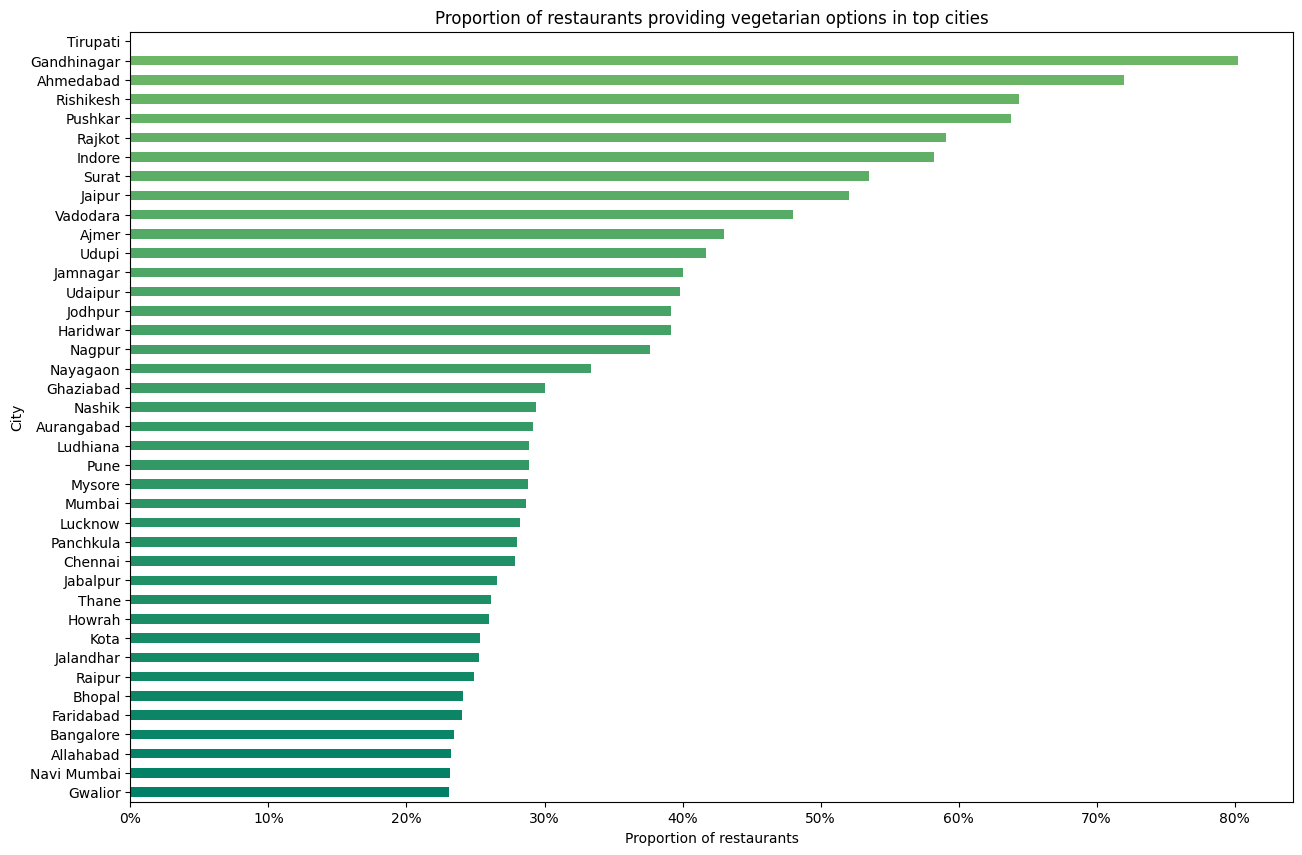

In [157]:
# Proportion of restaurants providing vegetarian and vegan options in top cities

filters= data.high.apply(lambda x: any(includes(x, ['Pure Veg','Vegan Options'])))
rest_by_cities= data.city.value_counts().sort_index()
veg_rest= data[filters].city.value_counts().sort_index()
(veg_rest/rest_by_cities).sort_values()[-40:].plot(kind='barh', color= get_color_codes(plt.cm.summer,90), figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0%}'))
plt.xlabel('Proportion of restaurants')
plt.ylabel('City')
plt.title('Proportion of restaurants providing vegetarian options in top cities')
plt.show()

This graph can help us understand the availability of vegetarian and vegan options in the top cities in India and identify cities with a higher proportion of vegetarian restaurants.

In [158]:
print('Localities where the best restaurants could be found in top 10 cities')
data[data.aggregate_rating >= 4.5].set_index('locality').groupby('city').votes.idxmax()[top_cities]

Localities where the best restaurants could be found in top 10 cities


city
Bangalore              Sarjapur Road
Mumbai                        Colaba
Pune         White Square, Hinjawadi
Chennai                     T. Nagar
New Delhi          Hauz Khas Village
Jaipur                 Shastri Nagar
Kolkata      RDB Boulevard, Sector 5
Ahmedabad                    Thaltej
Goa                       Betalbatim
Lucknow                     Aminabad
Name: votes, dtype: object

This information could be useful for tourists or locals looking for high-quality dining options in the top cities

## Histogram of aggregate rating of restaurant (drop the unrated restaurant)

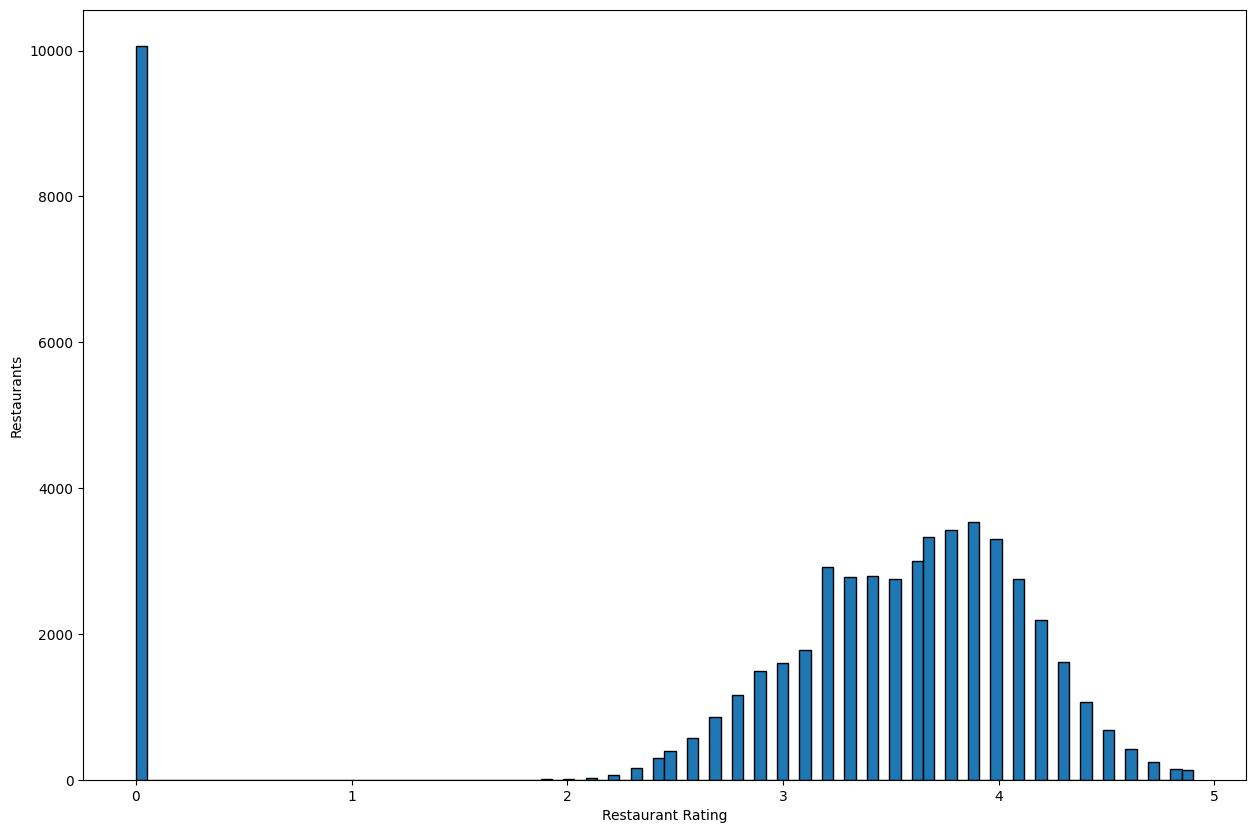

In [159]:
zomato_ratings = data[data['rating_text']!='Not Rated'].copy()
ratings = np.array(zomato_ratings['aggregate_rating'])
nan_ratings = np.isnan(ratings)
not_nan_ratings = ~ nan_ratings
ratings = ratings[not_nan_ratings]

plt.xlabel("Restaurant Rating")
plt.ylabel("Restaurants")
xt = np.arange(6)
plt.hist(ratings,bins = "auto", edgecolor = "black")
plt.xticks(xt)
plt.show()

The resulting histogram shows the distribution of restaurant ratings in the dataset, with the majority of restaurants having ratings between 3 and 4.3

<Axes: xlabel='price_range', ylabel='aggregate_rating'>

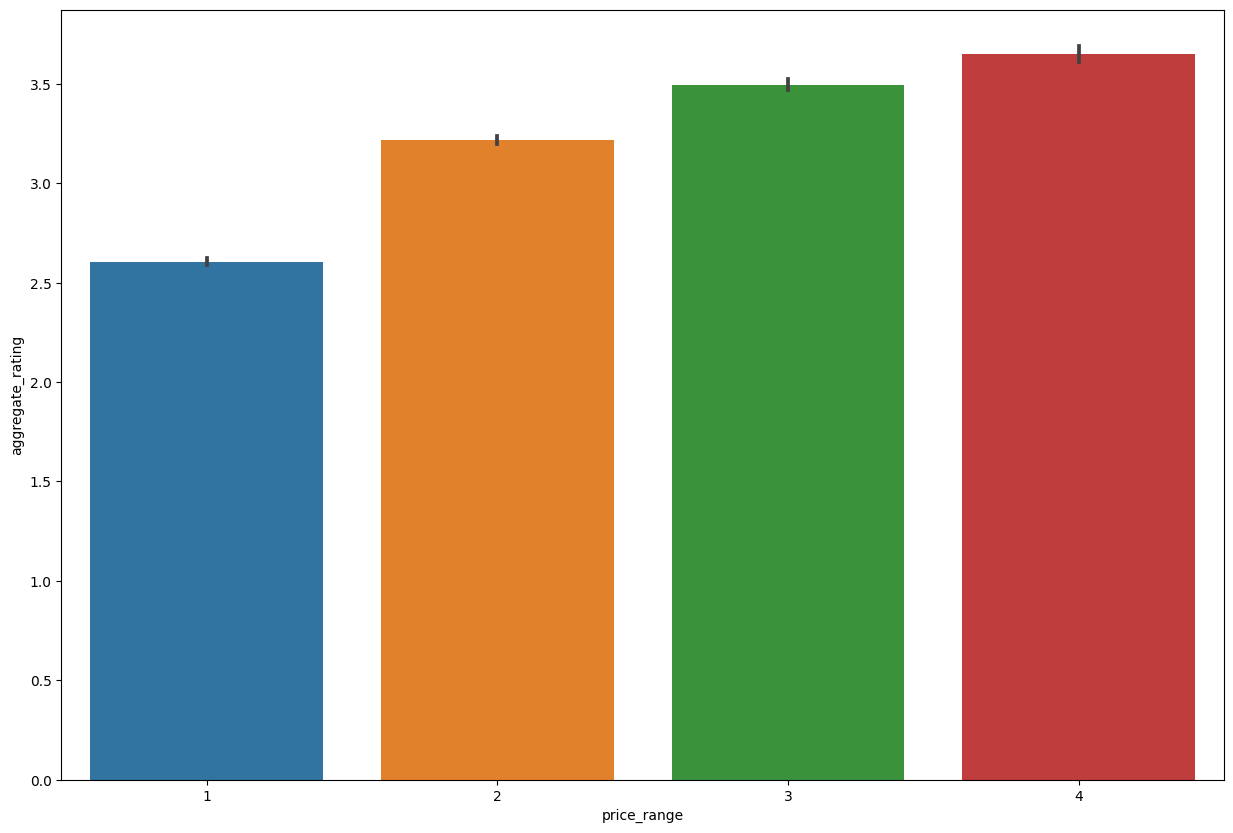

In [160]:
sns.barplot(x=data.price_range,y=data.aggregate_rating)



This demonstrates the typical pattern of user evaluations. Restaurants with lesser prices typically receive lower reviews than those with higher prices. The evaluations between pricing categories 3 and 4 are substantially similar. However, there is considerable overlap in the confidence intervals, particularly between the 2 and 3 price ranges, suggesting that the relationship may not be statistically significant.

## Pie Chart of top 10 popular cuisines


In [161]:
data['cuisines'].dropna(inplace=True)
cuisines_popular = {}

def get_cuisines(cuisines):
    cuisines = str(cuisines)
    if cuisines!="":
        for cuisine in cuisines.split(', '):
            cuisines_popular[cuisine] = cuisines_popular.get(cuisine,0)+1
    return cuisines

data['cuisines'].apply(get_cuisines)
count_cuisines = [[value,key] for key,value in cuisines_popular.items()]
count_cuisines.sort(reverse=True)
counts = [i[0] for i in count_cuisines][:10]
cuisine_names = [i[1] for i in count_cuisines][:10]

# for i in range(len(cuisine_names)):
#     print(i+1,cuisine_names[i],round(100.00*counts[i]/sum(counts),2))
plt.pie(counts,labels=cuisine_names,autopct="%.2f")
plt.show()


By arranging them in a pie chart, we can see that North Indian food is the most popular with 23.45%, followed by Chinese food with 15.52%.

| Rank |    Cuisine   |   %   |
|:----:|:------------:|:-----:|
|   1  | North Indian | 23.45 |
|   2  |    Chinese   | 15.52 |
|   3  |   Fast Food  | 14.62 |
|   4  |    Deserts   |  8.62 |
|   5  |  Beverages   |  8.24 |
|   6  |  South Indian|  7.78 |
|   7  |   Continental|  6.19 |
|   8  |   Bakery   |  5.87 |
|   9  |    Cafe   |  5.19 |
|  10  |    Street Food   |  4.53 |


### Highest voted restaurant

Text(0, 0.5, 'Votes')

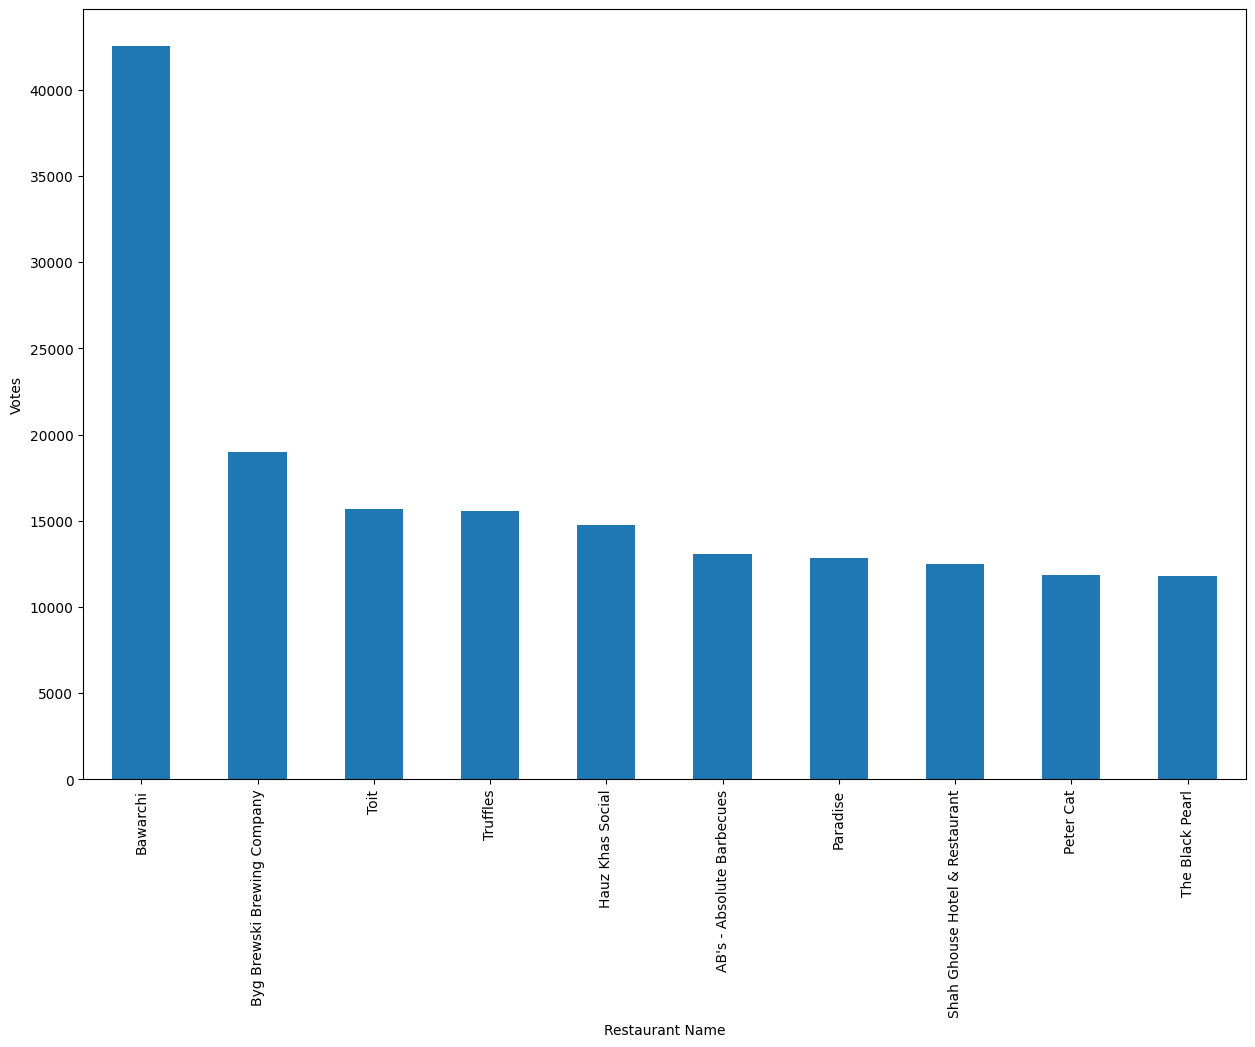

In [162]:
data.groupby('name')['votes'].max().nlargest(10).plot.bar()
plt.xlabel("Restaurant Name")
plt.ylabel("Votes")

The graph shows that Bawachi is the restaurant with the most votes.

### Foodie areas

In [163]:
plt.figure(figsize=(10,7))

plt.ylabel("Locality")
Restaurant_locations=data['locality'].value_counts()[:20]
plt.xlabel("Number of Restaurants")
sns.barplot(x=Restaurant_locations,y=Restaurant_locations.index)

<Axes: xlabel='locality', ylabel='Locality'>

We can see that Civil Lines and Model town have the most restaurants.
With more than 700 restaurants, Civil Lines dominates the area.

## Ratings vs Cuisines

In [164]:
cuisines = data["cuisines"]

In [165]:
data.cuisines.value_counts()

North Indian                                                        4295
Fast Food                                                           2025
North Indian, Chinese                                               1636
Bakery                                                              1585
South Indian                                                        1489
                                                                    ... 
North Indian, South Indian, Asian                                      1
Bakery, Desserts, Fast Food, South Indian, Chinese, North Indian       1
Continental, American, South Indian, North Indian                      1
Ice Cream, Fast Food, Street Food                                      1
North Indian, Lucknowi, Chinese                                        1
Name: cuisines, Length: 9383, dtype: int64

In [227]:
city_names=data.city.value_counts().index

In [228]:
city_values=data.city.value_counts().values

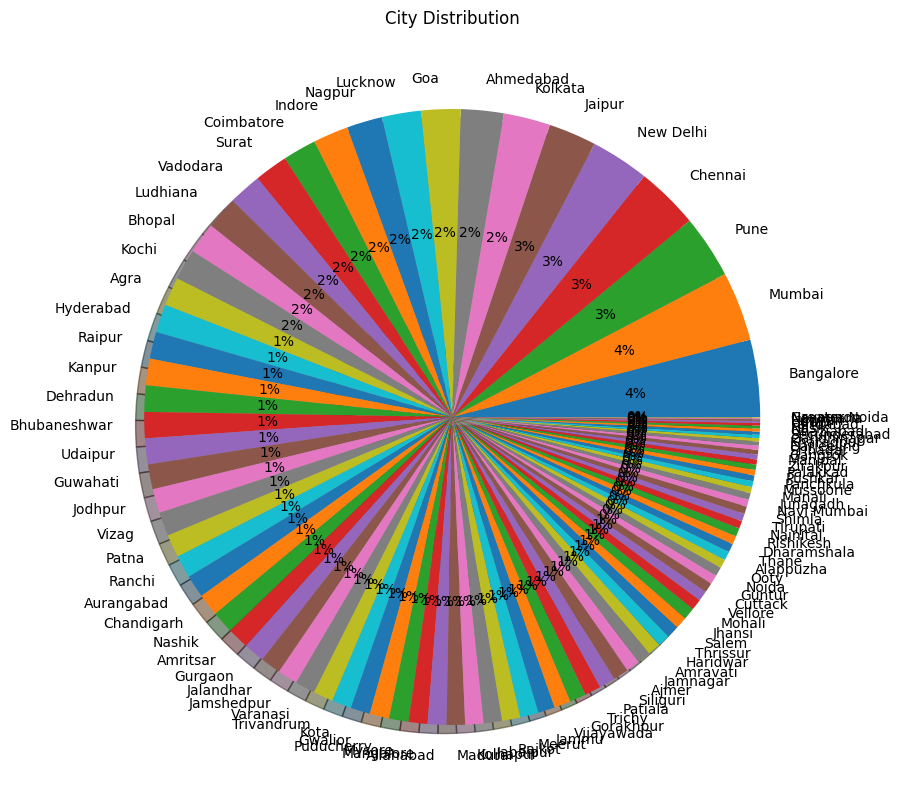

In [229]:
plt.pie(city_values, labels=city_names, autopct='%.0f%%', shadow=True)
plt.title('City Distribution')
plt.show()


This pie chart shows the distribution of restaurants across the cities in the dataset, with each slice of the pie representing a city and its percentage of the total number of restaurants.

### Top 10 cities with highest restaurant counts


In [238]:
top_cities = data.city.value_counts()[:10]
city_names = top_cities.index
city_values1 = top_cities.values

plt.pie(city_values1, labels=city_names, autopct='%.0f%%', shadow=True)
plt.title('Distribution of Restaurants in Top 10 Cities')
plt.show()


In [170]:
ratings=data.groupby(['aggregate_rating', 'rating_text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

aggregate_rating rating_text  Rating Count
0                0.0   Not rated         10058
1                1.8        Poor             2
2                1.9        Poor             4
3                2.0        Poor            10
4                2.1        Poor            28
..               ...         ...           ...
90               4.7      Skvělé             1
91               4.8   Excelente             1
92               4.8   Excellent           141
93               4.9   Excellent           129
94               4.9      Skvělé             1

[95 rows x 3 columns]

<Axes: title={'center': 'Distribution of Restaurants Ratings vs Numeber of Votes'}, xlabel='aggregate_rating', ylabel='Rating Count'>

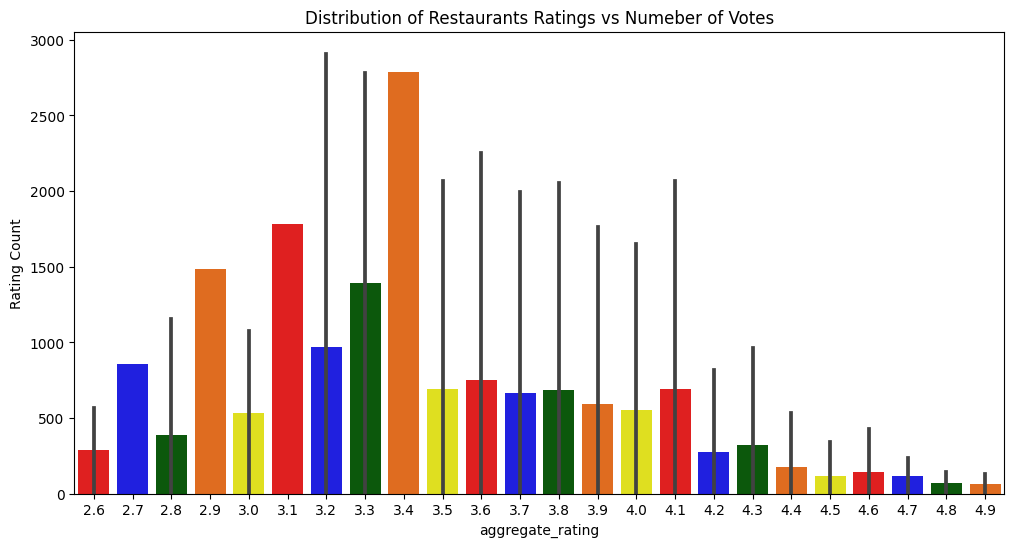

In [171]:
matplotlib.rcParams['figure.figsize']=(12,6)
plt.title('Distribution of Restaurants Ratings vs Numeber of Votes')
sns.barplot(x='aggregate_rating',y='Rating Count',data=ratings[10:],palette=['#FF0000','#0000FF','#006400','#FF6600','#FFFF00'])

The barplot shows the distribution of restaurant ratings based on the number of ratings received

## Cities vs Ratings

In [172]:
#This gives us an idea of how many restaurants are present in each city, since each row in the DataFrame corresponds to a single restaurant.
city = data["city"].value_counts()

In [173]:
cityRate = data[data["city"].isin(city.index)].groupby("city").mean()["aggregate_rating"].sort_values(ascending=True).round(2)

print(cityRate)

city
Alappuzha       0.38
Palakkad        0.55
Kharagpur       0.84
Pushkar         0.86
Darjeeling      0.96
                ... 
New Delhi       3.73
Kolkata         3.75
Hyderabad       3.76
Secunderabad    3.82
Gurgaon         3.83
Name: aggregate_rating, Length: 99, dtype: float64


Text(0.5, 1.0, 'Average restaurant ratings by city')

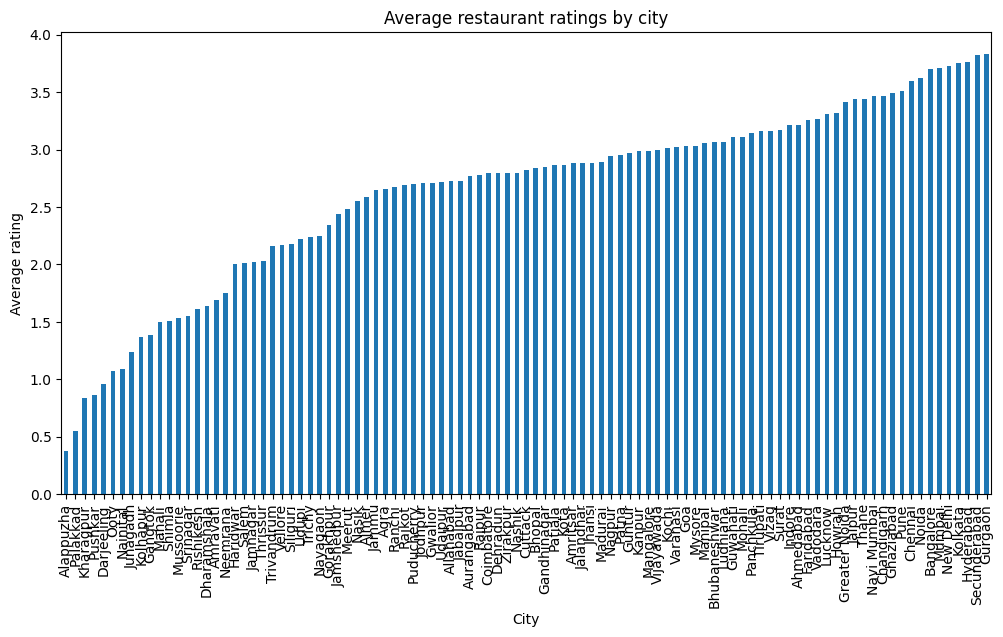

In [174]:
cityRate.plot.bar()
plt.ylabel('Average rating')
plt.xlabel('City')
plt.title('Average restaurant ratings by city')

In [175]:
last5City = cityRate.head()
last5City

city
Alappuzha     0.38
Palakkad      0.55
Kharagpur     0.84
Pushkar       0.86
Darjeeling    0.96
Name: aggregate_rating, dtype: float64

The cities with lowest average restaurant ratings are Alapuzha, Palakkad, Kharagpur, Pushkar and Darjeeling 

Now the most used or highly available cuisines in these cities

In [176]:
cities = ["Alappuzha","Palakkad","Kharagpur","Pushkar","Darjeeling"]

In [177]:
new_data = data.loc[data['city'].isin(cities)]
new_data

res_id                          name  establishment  \
9213    18695669             Madras Veg Tables  Casual Dining   
9214    18697582      Halais Family Restaurant  Casual Dining   
9215    18697052                 Arabian Shake    Quick Bites   
9216    18695597       Thaff Family Restaurant  Casual Dining   
9217    18695715                           KFC    Quick Bites   
...          ...                           ...            ...   
169405  18693083                  Rainbow Cafe           Café   
169406  18693361                     Moon Cafe           Café   
169408  18693752  Hotel Hare Rama Hare Krishna           Café   
169409  18693757                 Seven Chakras           Café   
169417  18693348                  Fresh Bakery         Bakery   

                                                      url  \
9213    https://www.zomato.com/alappuzha/madras-veg-ta...   
9214    https://www.zomato.com/alappuzha/halais-family...   
9215    https://www.zomato.com/alappuzha/arabian-shake...   
9216    https://www.zomato.com/alappuzha/thaff-family-...   
9217    https://www.zomato.com/alappuzha/kfc-pazhaveed...   
...                                                   ...   
169405  https://www.zomato.com/pushkar/rainbow-cafe-ch...   
169406  https://www.zomato.com/pushkar/moon-cafe-choti...   
169408  https://www.zomato.com/pushkar/hotel-hare-rama...   
169409  https://www.zomato.com/pushkar/seven-chakras-c...   
169417  https://www.zomato.com/pushkar/fresh-bakery-ch...   

                                                  address       city  city_id  \
9213    30/700, A B Elements Hospitality Service, Kala...  Alappuzha    11297   
9214    Near South Police Station, CCSB Road, Anantha ...  Alappuzha    11297   
9215               Indira Junction, Koyippalli, Alappuzha  Alappuzha    11297   
9216    Zila Court Road, Ambalapuzha Circle, Punnapra,...  Alappuzha    11297   
9217    Opposite SD College, Kalarcode, Eravukadu, Paz...  Alappuzha    11297   
...                                                   ...        ...      ...   
169405           Near Gautam Ashram, Choti Basti, Pushkar    Pushkar    11293   
169406             Near Lake Bridge, Choti Basti, Pushkar    Pushkar    11293   
169408             Jamini Kund Road, Choti Basti, Pushkar    Pushkar    11293   
169409             Jamini Kund Road, Choti Basti, Pushkar    Pushkar    11293   
169417  Near Hotel Yash Star, Vaam Dev Road, Choti Bas...    Pushkar    11293   

                     locality   latitude  longitude  ...  \
9213                 Punnapra   9.466194  76.339020  ...   
9214    Anantha Narayanapuram   9.494748  76.331480  ...   
9215               Koyippalli   9.510072  76.338954  ...   
9216                 Punnapra   9.500926  76.338415  ...   
9217               Pazhaveedu   9.469094  76.338468  ...   
...                       ...        ...        ...  ...   
169405            Choti Basti  26.489532  74.557625  ...   
169406            Choti Basti  26.485799  74.556757  ...   
169408            Choti Basti  26.485872  74.563248  ...   
169409            Choti Basti  26.485871  74.563229  ...   
169417            Choti Basti  26.484346  74.561892  ...   

                                               highlights  aggregate_rating  \
9213    ['Debit Card', 'Dinner', 'Delivery', 'Takeaway...               3.5   
9214    ['Takeaway Available', 'Credit Card', 'Dinner'...               0.0   
9215    ['Lunch', 'Takeaway Available', 'No Alcohol Av...               4.0   
9216    ['Dinner', 'Takeaway Available', 'Breakfast', ...               0.0   
9217    ['Takeaway Available', 'Credit Card', 'Dinner'...               0.0   
...                                                   ...               ...   
169405  ['Takeaway Available', 'Cash', 'Dinner', 'Lunc...               0.0   
169406  ['Lunch', 'Breakfast', 'Takeaway Available', '...               0.0   
169408  ['Takeaway Available', 'Cash', 'Outdoor Seatin...               0.0   
169409  ['Ta

Unique cuisines that are available in these cities

In [178]:
cuisines = []
new_data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())
print(cuisines.unique())

Total number of unique cuisines =  48
['South Indian' 'Kerala' 'Beverages' 'Desserts' 'Fast Food' 'Seafood'
 'Chinese' 'North Indian' 'Burger' 'Thai' 'Indian' 'Continental' 'Arabian'
 'Bakery' 'Pizza' 'Juices' 'Cafe' 'Biryani' 'Sandwich' 'Finger Food'
 'Ice Cream' 'Asian' 'Tea' 'Street Food' 'Charcoal Chicken' 'Mithai'
 'Momos' 'Tibetan' 'Nepalese' 'No cuisine' 'Bengali' 'Italian' 'Mishti'
 'European' 'Mediterranean' 'Coffee' 'American' 'Healthy Food' 'Salad'
 'Mexican' 'Kebab' 'Rolls' 'BBQ' 'Lebanese' 'Israeli' 'Rajasthani'
 'German' 'Belgian']


In [179]:
table=new_data[['cuisines','city']]
table
A_cuisines={}
for i in table['cuisines']:
    i=str(i)
    array=i.strip().split(',')
    for a in array:
        if a.strip() in A_cuisines:
            A_cuisines[a.strip()]+=1
        else:
            A_cuisines[a.strip()]=1


In [180]:
sorted_values=sorted(A_cuisines,key=A_cuisines.get,reverse=True)[0:10]
size_array=[]

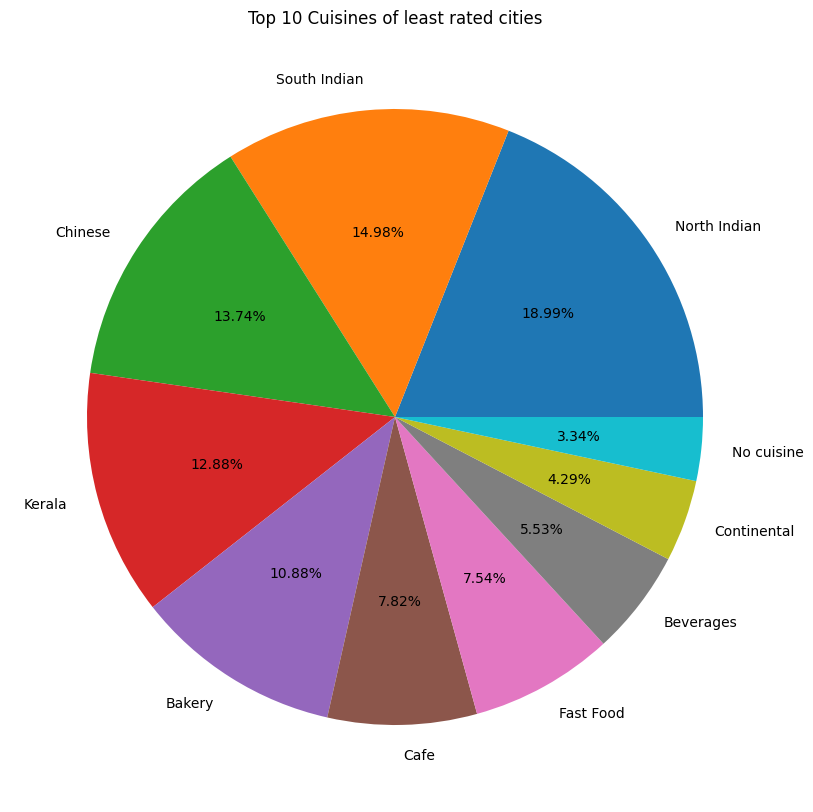

In [181]:
for i in sorted_values:
    size_array.append(A_cuisines[i])
plt.figure(figsize=(10,10))
plt.title("Top 10 Cuisines of least rated cities")
plt.pie(size_array,labels=sorted_values,autopct="%.2f%%")
plt.show()

### Top 10 cities with highest number of Restaurants


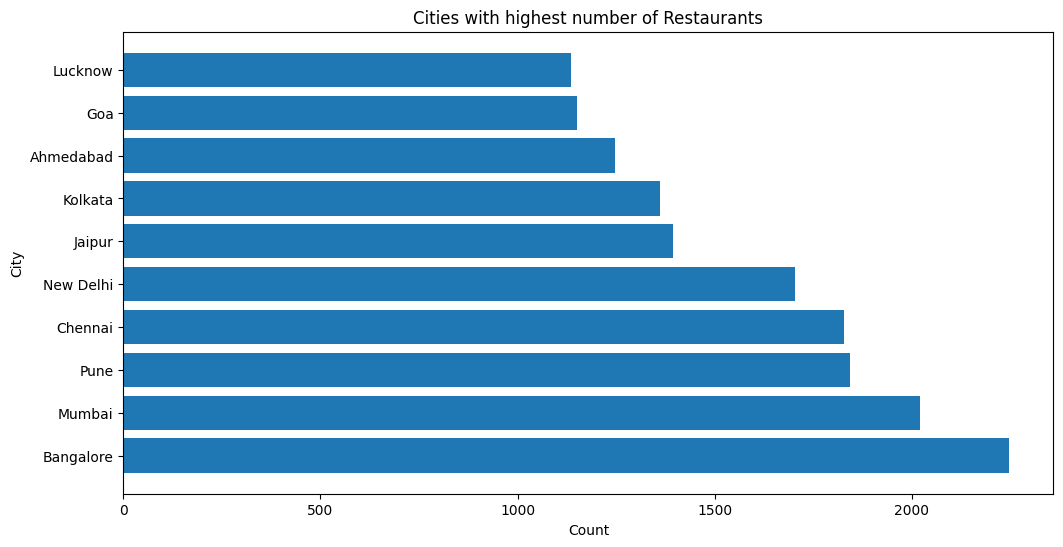

In [182]:

plt.barh(city_names[:10],city_values[:10])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Cities with highest number of Restaurants')
plt.show()

Bangalore is the city with highest number of restaurants with over 2000 restaurants followed by Mumbai and Pune. 

#### Localities with highest number of restaurants in Chennai

In [183]:
chennai_data = data.loc[data['city']=='Chennai']
chennai_data

res_id                   name  establishment  \
33460  18800810        The Black Pearl  Casual Dining   
33461  18588039                Fromage           Café   
33462  18595414         Coal Barbecues  Casual Dining   
33463     72604         Coal Barbecues  Casual Dining   
33464  18720717               The Bark           Café   
...         ...                    ...            ...   
43061     73302      Murugan Idli Shop  Casual Dining   
43069  18415247  Sangeetha's Desi Mane  Casual Dining   
43072     65419              Parfait 3  Casual Dining   
43077     71861             McDonald's    Quick Bites   
43078     68045         Hotel Sennthur  Casual Dining   

                                                     url  \
33460  https://www.zomato.com/chennai/the-black-pearl...   
33461  https://www.zomato.com/chennai/fromage-mrc-nag...   
33462  https://www.zomato.com/chennai/coal-barbecues-...   
33463  https://www.zomato.com/chennai/coal-barbecues-...   
33464  https://www.zomato.com/chennai/the-bark-1-alwa...   
...                                                  ...   
43061  https://www.zomato.com/chennai/murugan-idli-sh...   
43069  https://www.zomato.com/chennai/sangeethas-desi...   
43072  https://www.zomato.com/chennai/parfait-3-velac...   
43077  https://www.zomato.com/chennai/mcdonalds-adyar...   
43078  https://www.zomato.com/chennai/hotel-sennthur-...   

                                                 address     city  city_id  \
33460  Plot 155, 292/132, Ground Floor, Rajiv Gandhi ...  Chennai        7   
33461  Somerset Greenway, Lords Avenue, MRC Nagar, Ch...  Chennai        7   
33462    40, 2nd Floor, Bazullah Road, T. Nagar, Chennai  Chennai        7   
33463  Shop 17-18, Rajalakshmi Nagar, 7th Cross Stree...  Chennai        7   
33464  40, Maharaja Surya Rao Road, Dutch Village, Al...  Chennai        7   
...                                                  ...      ...      ...   
43061          129/28, 100 Feet Road, Velachery, Chennai  Chennai        7   
43069            23/35,10th Avenue, Ashok Nagar, Chennai  Chennai        7   
43072  80B, CSI Church Gate Road, Taramani Road, Anna...  Chennai        7   
43077      2nd Cross Street, Gandhinagar, Adyar, Chennai  Chennai        7   
43078  70&71, Opposite MRF Building, Nungambakkam, Ch...  Chennai        7   

             locality   latitude  longitude  ...  \
33460  Sholinganallur  12.901449  80.226841  ...   
33461       MRC Nagar  13.017164  80.270704  ...   
33462        T. Nagar  13.046809  80.237021  ...   
33463       Velachery  12.986057  80.218224  ...   
33464        Alwarpet  13.039406  80.253839  ...   
...               ...        ...        ...  ...   
43061       Velachery  12.978763  80.219295  ...   
43069     Ashok Nagar  13.034531  80.214851  ...   
43072       Velachery  12.979054  80.226719  ...   
43077           Adyar  13.006814  80.254225  ...   
43078    Nungambakkam  13.057207  80.254655  ...   

                                              highlights  aggregate_rating  \
33460  ['Dinner', 'Cash', 'Credit Card', 'Debit Card'...               4.8   
33461  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...               4.5   
33462  ['Dinner', 'Cash', 'Credit Card', 'Debit Card'...               4.9   
33463  ['Cash', 'Credit Card', 'Debit Card', 'Deliver...               4.9   
33464  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...               4.4   
...                                                  ...               ...   
43061  ['Cash', 'Takeaway Available', 'Dinner', 'Deli...               4.1   
43069  ['Dinner', 'Cash', 'Takeaway Available', 'Cred...               4.1   
43072  ['Lunch', 'Cash', 'Takeaway Available', 'Break...               3.9   
43077  ['Cash', 'Debit Card', 'Takeaway Available', '...               3.9   
43078  ['Lunch', 'Cash', 'Takeaway Available', 'Credi...               4.3   

      rating_text votes photo_count  opentable_support  delivery takeaway  \
33460   Excellent  2486    

In [184]:
chennai_lnames=chennai_data.locality.value_counts().index
Chennai_lvalues = chennai_data.locality.value_counts().values

In [185]:
chennai_lRate = chennai_data[chennai_data["locality"].isin(chennai_lnames)].groupby("locality").mean()["aggregate_rating"].sort_values(ascending=False).sort_values(ascending=True)
print(chennai_lRate)

locality
Grand Galada Mall, Meenambakkam                   0.0
Chennai Food Town, Thuraipakkam                   0.0
Kelambakkam                                       0.0
Four Points by Sheraton, East Coast Road (ECR)    0.0
GRT Regency, Kanchipuram                          0.0
                                                 ... 
The Spring Hotel, Nungambakkam                    4.4
Hotel Rajpark, Alwarpet                           4.4
MRC Nagar                                         4.5
Grand by GRT Hotels                               4.6
Ispahani Centre, Nungambakkam                     4.7
Name: aggregate_rating, Length: 220, dtype: float64


In [186]:
ChennaiR= chennai_data.groupby(['locality', 'aggregate_rating','rating_text']).size().reset_index().rename(columns={0:'Rating Count'})
ChennaiR

locality  aggregate_rating  \
0      InterContinental Chennai Mahabalipuram Resort...               4.1   
1      InterContinental Chennai Mahabalipuram Resort...               4.5   
2                                         Abhiramapuram               3.1   
3                                         Abhiramapuram               4.5   
4                           Abu Sarovar Portico, Egmore               2.6   
...                                                 ...               ...   
1055                                      West Mambalam               3.9   
1056                                      West Mambalam               4.1   
1057                                      West Mambalam               4.5   
1058                     Zone by The Park, Pallikaranai               3.7   
1059                     Zone by The Park, Pallikaranai               3.8   

     rating_text  Rating Count  
0      Very Good             1  
1      Excellent             2  
2        Average             1  
3      Excellent             1  
4        Average             1  
...          ...           ...  
1055        Good             1  
1056   Very Good             1  
1057   Excellent             1  
1058        Good             1  
1059        Good             1  

[1060 rows x 4 columns]

-----------------------------------------------
Localities Having Highest Number Of Restaurants
-----------------------------------------------
| Locality             | No. Of restaurants |
-----------------------------------------------
| Velachery            |         22     |
-----------------------------------------------
| Adyar                |         21     |
-----------------------------------------------
| Nungambakkam         |         21     |
-----------------------------------------------
| T. Nagar             |         21     |
-----------------------------------------------
| Anna Nagar West      |         20     |
-----------------------------------------------


Text(0, 0.5, 'Locality')

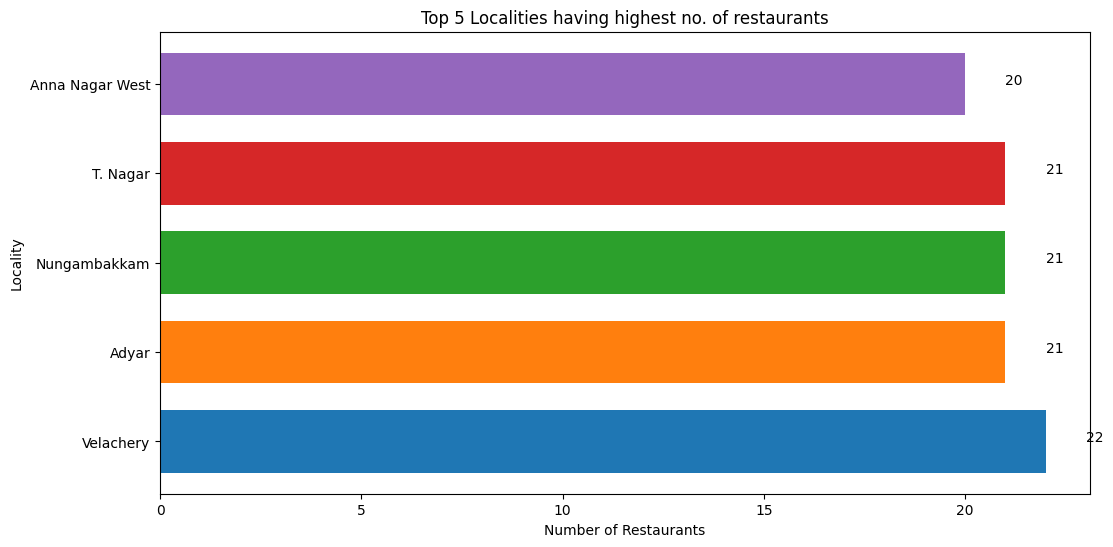

In [187]:
r_dict={}
for i in ChennaiR['locality']:
    if i in r_dict:
        r_dict[i]+=1
    else:
        r_dict[i]=1

outlets_sorted=sorted(r_dict,key=r_dict.get,reverse=True)[0:5]

print("-----------------------------------------------")
print("Localities Having Highest Number Of Restaurants")
print("-----------------------------------------------")
print("| {:20s} | {:14s} |".format('Locality','No. Of restaurants'))
print("-----------------------------------------------")
for i in outlets_sorted:
    print("| {:20s} | {:10d}     |".format(i,r_dict[i]))
    print("-----------------------------------------------")
    # Plotting the graph
    plt.barh(width=r_dict[i],y=i,height=0.7)
    plt.text(y=i,x=r_dict[i]+1,s=r_dict[i])
plt.title('Top 5 Localities having highest no. of restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Locality')


In [188]:
outlets_sorted

['Velachery', 'Adyar', 'Nungambakkam', 'T. Nagar', 'Anna Nagar West']

In [189]:
LocalityRate = data[data["locality"].isin(outlets_sorted)].groupby("locality").mean()["aggregate_rating"].sort_values(ascending=False)
print(LocalityRate)

locality
Nungambakkam       3.919792
Adyar              3.795588
T. Nagar           3.782558
Velachery          3.614063
Anna Nagar West    3.561702
Name: aggregate_rating, dtype: float64


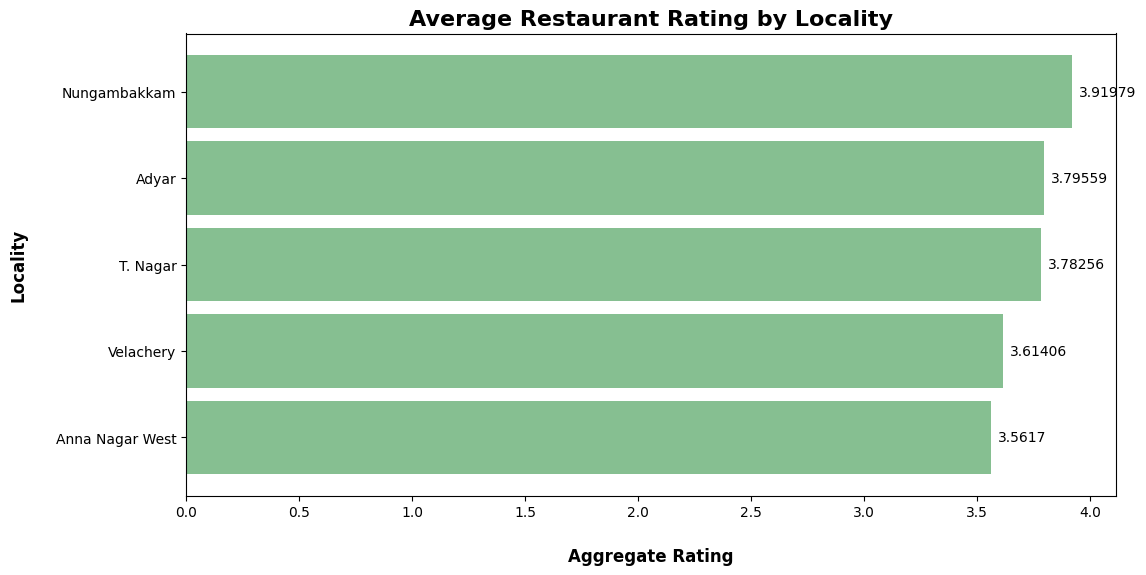

In [190]:
# Plot the horizontal bar chart
ax = LocalityRate.plot(kind='barh', color='#86bf91', zorder=2, width=0.85)

# Add x-axis label
ax.set_xlabel("Aggregate Rating", labelpad=20, weight='bold', size=12)

# Add y-axis label
ax.set_ylabel("Locality", labelpad=20, weight='bold', size=12)

# Add title
ax.set_title("Average Restaurant Rating by Locality", fontweight='bold', size=16)

# Add bar labels
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10, padding=5)

# Invert y-axis
ax.invert_yaxis()

# Show the plot
plt.show()

The plot above displays the localities with highly rated restaurants in Chennai

## Comparing different types of restaurants with satisfaction ratings

In [191]:
mpl.rcParams['figure.figsize'] = (15,10)

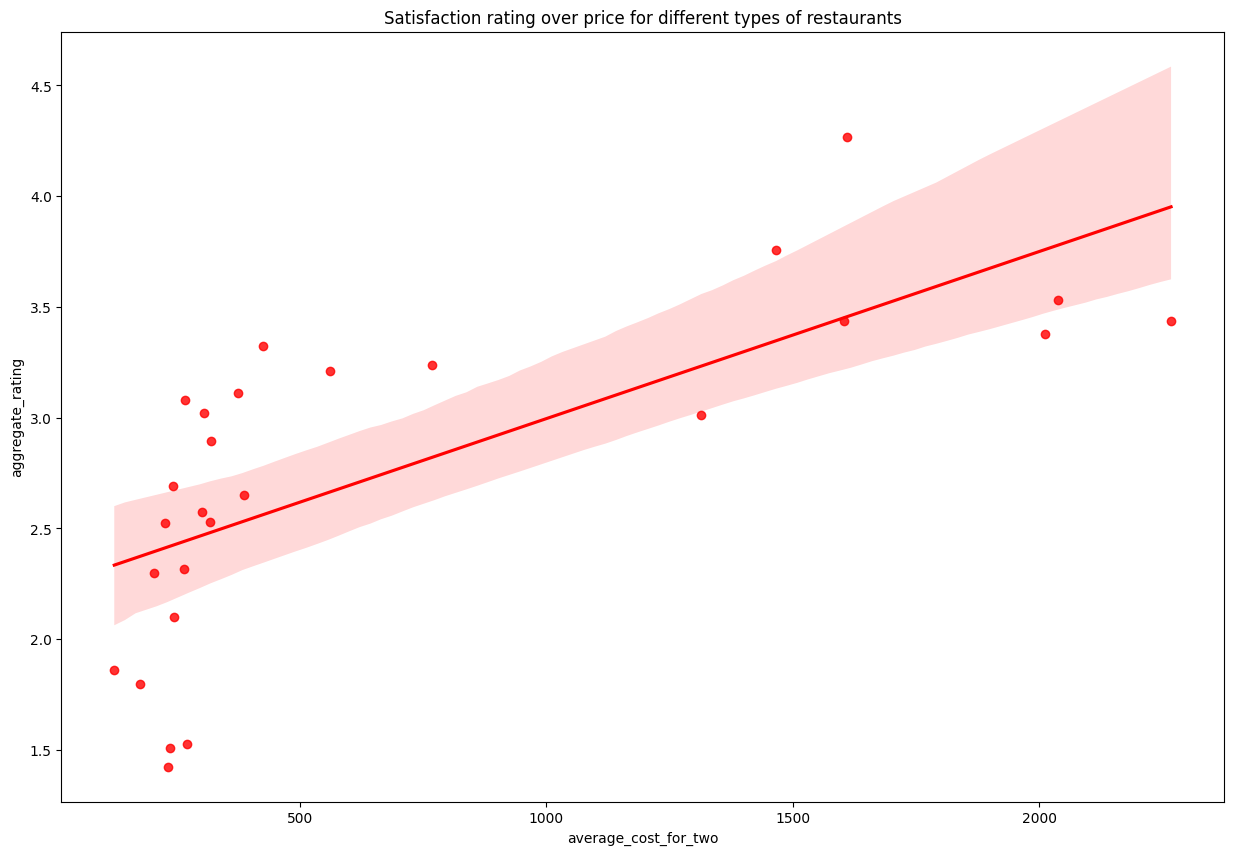

The correlation coefficient between price and satisfaction rating is: 0.7003483742767943


In [192]:

# # Group the data by restaurant type and calculate the average price and satisfaction rating for each type
grouped_data = data.groupby("establishment").agg({"average_cost_for_two": "mean", "aggregate_rating": "mean"})

#to plot the data on a scatter plot
sns.regplot(x="average_cost_for_two", y="aggregate_rating", data=grouped_data, color='red')
plt.title('Satisfaction rating over price for different types of restaurants')
plt.show()

#to calculate the Pearson correlation coefficient
correlation_coefficient = np.corrcoef(grouped_data["average_cost_for_two"], grouped_data["aggregate_rating"])[0,1]

#to print the correlation coefficient
print("The correlation coefficient between price and satisfaction rating is:", correlation_coefficient)



The resulting plot will show the scatter plot of the data points, along with the line of best fit that represents the relationship between price and satisfaction rating. The line has a positive slope, this indicates a positive correlation between price and satisfaction rating. 

By examining the scatter plot and the correlation coefficient, we can gain insights into how prices vary across different types of restaurants and how this affects customer satisfaction ratings. 

The line of best fit has a positive slope, we can conclude that customers are generally willing to pay more for higher quality food and better dining experiences. By analyzing the data and generating insights, we can make more informed decisions about pricing strategies and customer satisfaction initiatives.


###  How to compare the average prices and their average customer rating for different cities?


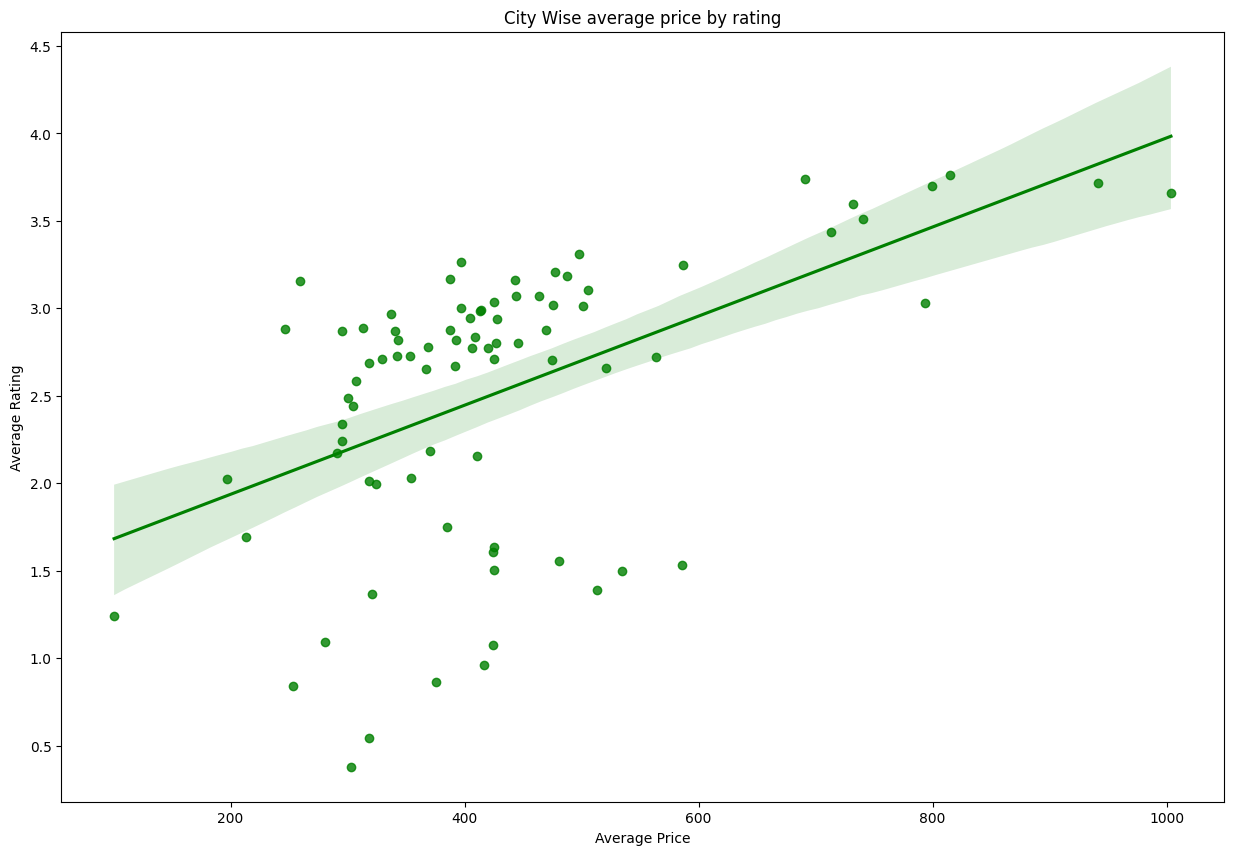

In [193]:
#to calculate the average price and average rating for each city
city_data = data.groupby('city_id').agg({'average_cost_for_two': 'mean', 'aggregate_rating': 'mean'})

# to plot the average price and average rating for each city
sns.regplot(x="average_cost_for_two", y="aggregate_rating", data=city_data,color='green')
plt.xlabel('Average Price')
plt.ylabel('Average Rating')
plt.title('City Wise average price by rating')
plt.show()


we use groupby() to group the restaurant data by city, and then use agg() to calculate the mean price and mean rating for each city. We then reset the index of the resulting dataframe using reset_index() to make it easier to plot later.

Finally, we plot the average price and average rating for each city using sns.regplot() This method is used to plot data and a linear regression model fit. We set the x-axis to the city column, and the y-axis to the price and rating columns. We also set the x-axis label to "Price", the y-axis label to "Ratings", and then show the plot using plt.show().

The resulting plot will show the scatter plot of the data points, along with the line of best fit that represents the relationship between price and satisfaction rating. The line has a positive slope, this indicates a positive correlation between price and satisfaction rating.
#By analyzing the data and generating insights, we can make more informed decisions about pricing strategies and customer satisfaction initiatives. 



## Restaurant chains
Here chains represent restaurants with more than one outlet

In [194]:
outlets = data["name"].value_counts()

In [195]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [196]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


<b>35%</b> of total restaurants are part of some kind of restaurant chain. Here, we should account for cases where two different retaurants might have exact same name but are not related to each other.


In [258]:
c=n[n['city'] =='Chennai']

c.shape


(1827, 27)

In [259]:
outlets = c["name"].value_counts()

outlets

ibaco                        42
A2B - Adyar Ananda Bhavan    29
Lassi Shop                   19
Hotel Saravana Bhavan        17
KFC                          16
                             ..
Tulips - Green Park Hotel     1
Oasis - Radisson Blu          1
Colony - The Raintree         1
A2 - The Park                 1
Hotel Sennthur                1
Name: name, Length: 1271, dtype: int64

In [199]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [200]:
print(chains.shape)

print(single.shape)

(180,)
(1091,)


In [201]:
#chain of restaurants in chennai
c_filtered = c[c['name'].isin(chains.index)]
c_filtered

res_id                   name  establishment  \
10270  18595414         Coal Barbecues  Casual Dining   
10271     72604         Coal Barbecues  Casual Dining   
10274  18938720         Coal Barbecues  Casual Dining   
10276  18660975               Paradise  Casual Dining   
10277     65528           Shree Mithai     Sweet Shop   
...         ...                    ...            ...   
12086     73258                   Pind  Casual Dining   
12088     65499  Hotel Saravana Bhavan  Casual Dining   
12090     73302      Murugan Idli Shop  Casual Dining   
12092     65419              Parfait 3  Casual Dining   
12093     71861             McDonald's    Quick Bites   

                                                     url  \
10270  https://www.zomato.com/chennai/coal-barbecues-...   
10271  https://www.zomato.com/chennai/coal-barbecues-...   
10274  https://www.zomato.com/chennai/coal-barbecues-...   
10276  https://www.zomato.com/chennai/paradise-porur?...   
10277  https://www.zomato.com/chennai/shree-mithai-an...   
...                                                  ...   
12086  https://www.zomato.com/chennai/pind-thuraipakk...   
12088  https://www.zomato.com/chennai/hotel-saravana-...   
12090  https://www.zomato.com/chennai/murugan-idli-sh...   
12092  https://www.zomato.com/chennai/parfait-3-velac...   
12093  https://www.zomato.com/chennai/mcdonalds-adyar...   

                                                 address     city  city_id  \
10270    40, 2nd Floor, Bazullah Road, T. Nagar, Chennai  Chennai        7   
10271  Shop 17-18, Rajalakshmi Nagar, 7th Cross Stree...  Chennai        7   
10274  1A-1B, Rajiv Gandhi Salai, Old Mahabalipuram R...  Chennai        7   
10276  Survey 38/1, Mount Poonamallee High Road, Poru...  Chennai        7   
10277  189, AI Block, Shanthi Colony, Anna Nagar East...  Chennai        7   
...                                                  ...      ...      ...   
12086  MRK Arcade, 200 Feet Radial Road, Thuraipakkam...  Chennai        7   
12088        Y 209, 2nd Avenue, Anna Nagar West, Chennai  Chennai        7   
12090          129/28, 100 Feet Road, Velachery, Chennai  Chennai        7   
12092  80B, CSI Church Gate Road, Taramani Road, Anna...  Chennai        7   
12093      2nd Cross Street, Gandhinagar, Adyar, Chennai  Chennai        7   

              locality   latitude  longitude  ... currency  \
10270         T. Nagar  13.046809  80.237021  ...      Rs.   
10271        Velachery  12.986057  80.218224  ...      Rs.   
10274         Navallur  12.851545  80.226354  ...      Rs.   
10276            Porur  13.028899  80.170379  ...      Rs.   
10277  Anna Nagar East  13.082091  80.211976  ...      Rs.   
...                ...        ...        ...  ...      ...   
12086     Thuraipakkam  12.949734  80.237725  ...      Rs.   
12088  Anna Nagar West  13.084983  80.210318  ...      Rs.   
12090        Velachery  12.978763  80.219295  ...      Rs.   
12092        Velachery  12.979054  80.226719  ...      Rs.   
12093            Adyar  13.006814  80.254225  ...      Rs.   

                                              highlights aggregate_rating  \
10270  ['Dinner', 'Cash', 'Credit Card', 'Debit Card'...              4.9   
10271  ['Cash', 'Credit Card', 'Debit Card', 'Deliver...              4.9   
10274  ['Lunch', 'Cash', 'Credit Card', 'Debit Card',...              4.9   
10276  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...              4.2   
10277  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...              4.4   
...                                                  ...              ...   
12086  ['Dinner', 'Delivery', 'Breakfast', 'Debit Car...              4.2   
12088  ['Credit Card', 'No Alcohol Available', 'Takea...              2.9   
12090  ['Cash', 'Takeaway Available', 'Dinner', 'Deli...              4.1   
12092  ['Lunch', 'Cash', 'Takeaway Available', 'Break...              3.9   
12093  ['Cash', 'Debit Card', 'Takeaway Available', '...              3.9 

In [202]:
# number of chain of restaurants for each restaurant in chennai

print(c_filtered['name'].value_counts())

ibaco                        42
A2B - Adyar Ananda Bhavan    29
Lassi Shop                   19
Hotel Saravana Bhavan        17
KFC                          16
                             ..
Donut House                   2
Double Roti                   2
Chai Galli                    2
The Chocolate Heaven          2
196 Degree Below              2
Name: name, Length: 180, dtype: int64


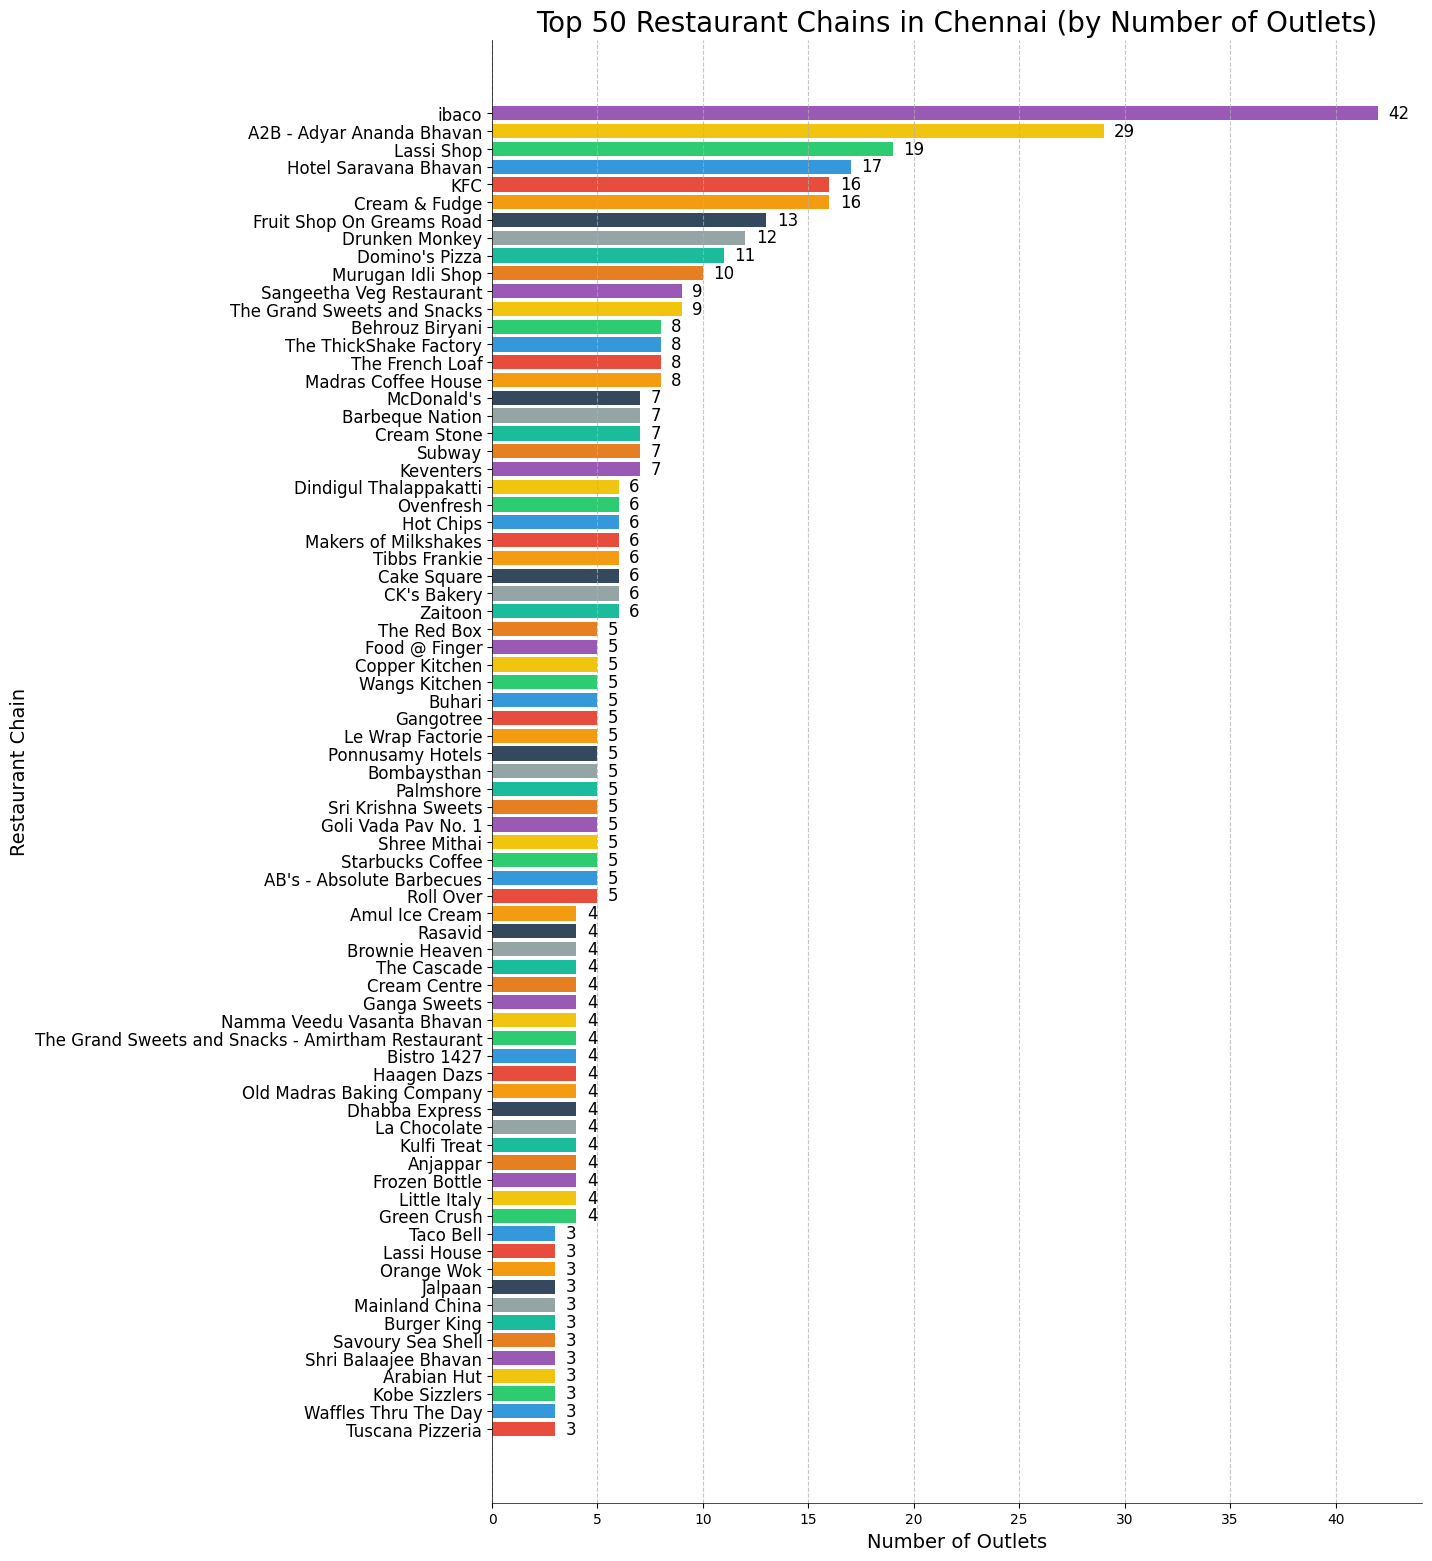

In [203]:
# Get the top 75 restaurant chains by number of outlets
top_chains = c['name'].value_counts().nlargest(75).sort_values(ascending=True)

# Define the colors for the bars
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f1c40f', '#9b59b6', '#e67e22', '#1abc9c', '#95a5a6', '#34495e', '#f39c12']

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=[12,19])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

bars = ax.barh(top_chains.index, top_chains.values, color=colors)

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, top_chains.values[i], ha='left', va='center', fontsize=12)

# Set the x-axis label
ax.set_xlabel('Number of Outlets', fontsize=14)

# Set the y-axis label and tick labels
ax.set_ylabel('Restaurant Chain', fontsize=14)
ax.set_yticklabels(top_chains.index, fontsize=12)

# Set the title
ax.set_title('Top 50 Restaurant Chains in Chennai (by Number of Outlets)', fontsize=20)

# Add a grid
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Ibaco has 42 outlets followed by Adyar Anand Bhavan with 29 outlets in Chennai.

In [204]:
# map for chain of restaurants in chennai

# Create a Folium map centered on Chennai
chennai_map = folium.Map(location=[13.0827, 80.2707], zoom_start=11.5)

# Add markers for each chain restaurant in Chennai
for index, row in c_filtered.iterrows():
    # Get the latitude and longitude of the restaurant
    lat = row['latitude']
    lon = row['longitude']
    # Create a popup message with the restaurant name and address
    popup_text = f"{row['name']}<br>{row['address']}"
    # Add a marker for the restaurant
    marker = folium.Marker([lat, lon], popup=popup_text)
    marker.add_to(chennai_map)

# Display the map
chennai_map

In [205]:
# restaurants with 1 outlet in chennai
c_filtered1 = c[~c['name'].isin(chains.index)]
c_filtered1

res_id                           name  establishment  \
10268  18800810                The Black Pearl  Casual Dining   
10269  18588039                        Fromage           Café   
10272  18720717                       The Bark           Café   
10273  18423043          Dhaba Estd 1986 Delhi  Casual Dining   
10275  18437170                   Nasi And Mee  Casual Dining   
...         ...                            ...            ...   
12081     73255  Lava Bar at Metro Grand Hotel            Bar   
12087     65268                 Kailash Parbat  Casual Dining   
12089  18634449           Chennight Restaurant            NaN   
12091  18415247          Sangeetha's Desi Mane  Casual Dining   
12094     68045                 Hotel Sennthur  Casual Dining   

                                                     url  \
10268  https://www.zomato.com/chennai/the-black-pearl...   
10269  https://www.zomato.com/chennai/fromage-mrc-nag...   
10272  https://www.zomato.com/chennai/the-bark-1-alwa...   
10273  https://www.zomato.com/chennai/dhaba-estd-1986...   
10275  https://www.zomato.com/chennai/nasi-and-mee-nu...   
...                                                  ...   
12081  https://www.zomato.com/chennai/lava-bar-at-met...   
12087  https://www.zomato.com/chennai/kailash-parbat-...   
12089  https://www.zomato.com/chennai/chennight-resta...   
12091  https://www.zomato.com/chennai/sangeethas-desi...   
12094  https://www.zomato.com/chennai/hotel-sennthur-...   

                                                 address     city  city_id  \
10268  Plot 155, 292/132, Ground Floor, Rajiv Gandhi ...  Chennai        7   
10269  Somerset Greenway, Lords Avenue, MRC Nagar, Ch...  Chennai        7   
10272  40, Maharaja Surya Rao Road, Dutch Village, Al...  Chennai        7   
10273  Bearing Door 123 - 124, Ishpahani Centre, Nung...  Chennai        7   
10275  18/24, Yafa Towers, Khader Nawaz Khan Road, Th...  Chennai        7   
...                                                  ...      ...      ...   
12081  Metro Grand Hotel, 540, Poonamallee High Road,...  Chennai        7   
12087  9, Atop French Loaf,2nd Avenue, Harrington, Ch...  Chennai        7   
12089  1, Bharathi Puram, Brewery Road, Shenoy Nagar,...  Chennai        7   
12091            23/35,10th Avenue, Ashok Nagar, Chennai  Chennai        7   
12094  70&71, Opposite MRF Building, Nungambakkam, Ch...  Chennai        7   

                            locality   latitude  longitude  ... currency  \
10268                 Sholinganallur  12.901449  80.226841  ...      Rs.   
10269                      MRC Nagar  13.017164  80.270704  ...      Rs.   
10272                       Alwarpet  13.039406  80.253839  ...      Rs.   
10273  Ispahani Centre, Nungambakkam  13.055052  80.249706  ...      Rs.   
10275                   Nungambakkam  13.060764  80.249714  ...      Rs.   
...                              ...        ...        ...  ...      ...   
12081                     Arumbakkam  13.076439  80.204995  ...      Rs.   
12087                        Chetpet  13.068995  80.237996  ...      Rs.   
12089                   Shenoy Nagar  13.080731  80.218676  ...      Rs.   
12091                    Ashok Nagar  13.034531  80.214851  ...      Rs.   
12094                   Nungambakkam  13.057207  80.254655  ...      Rs.   

                                              highlights aggregate_rating  \
10268  ['Dinner', 'Cash', 'Credit Card', 'Debit Card'...              4.8   
10269  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...              4.5   
10272  ['Dinner', 'Delivery', 'Credit Card', 'Lunch',...              4.4   
10273  ['Dinner', 'Mall Parking', 'Takeaway Available...              4.7   
10275  ['No Alcohol Available', 'Dinner', 'Takeaway A...              4.6   
...                                                  ...              ...   
12081  ['Lunch', 'Dinner', 'Takeaway Available', 'Cre...              3.4   
12087  ['Takeaway Available', 'Breakfast'

In [206]:
#map for restaurants(1 Outlet) in chennai

# Create a Folium map centered on Chennai
chennai_map = folium.Map(location=[13.0827, 80.2707], zoom_start=13)

# Add markers for each chain restaurant in Chennai
for index, row in c_filtered1.iterrows():
    # Get the latitude and longitude of the restaurant
    lat = row['latitude']
    lon = row['longitude']
    # Create a popup message with the restaurant name and address
    popup_text = f"{row['name']}<br>{row['address']}"
    # Add a marker for the restaurant
    marker = folium.Marker([lat, lon], popup=popup_text)
    marker.add_to(chennai_map)

# Display the map
chennai_map

In [207]:
# mean ratings for chain of restaurants
restaurant_ratings = c_filtered.groupby("name")["aggregate_rating"].mean().sort_values(ascending=True)

# Print top 25 restaurants with the highest average rating
print(round(restaurant_ratings,2).nlargest(20))


name
Coal Barbecues                  4.90
AB's - Absolute Barbecues       4.82
Chili's American Grill & Bar    4.80
Bombay Kulfi                    4.60
Blind Ch3mistry                 4.55
Wok Monk                        4.55
Barbeque Nation                 4.54
Mamagoto                        4.50
Palmshore                       4.48
Shakos                          4.47
Maplai                          4.40
Kakada Ramprasad                4.35
Delhi Highway                   4.30
Superstar Pizza                 4.30
Sandy's Chocolate Laboratory    4.30
Shree Mithai                    4.28
Mainland China                  4.27
Paradise                        4.27
Prive Restaurant                4.25
Little Italy                    4.22
Name: aggregate_rating, dtype: float64


Coal Barbecues has highest mean rating with 4.9 followed by AB's - Absolute Barbecues with 4.82

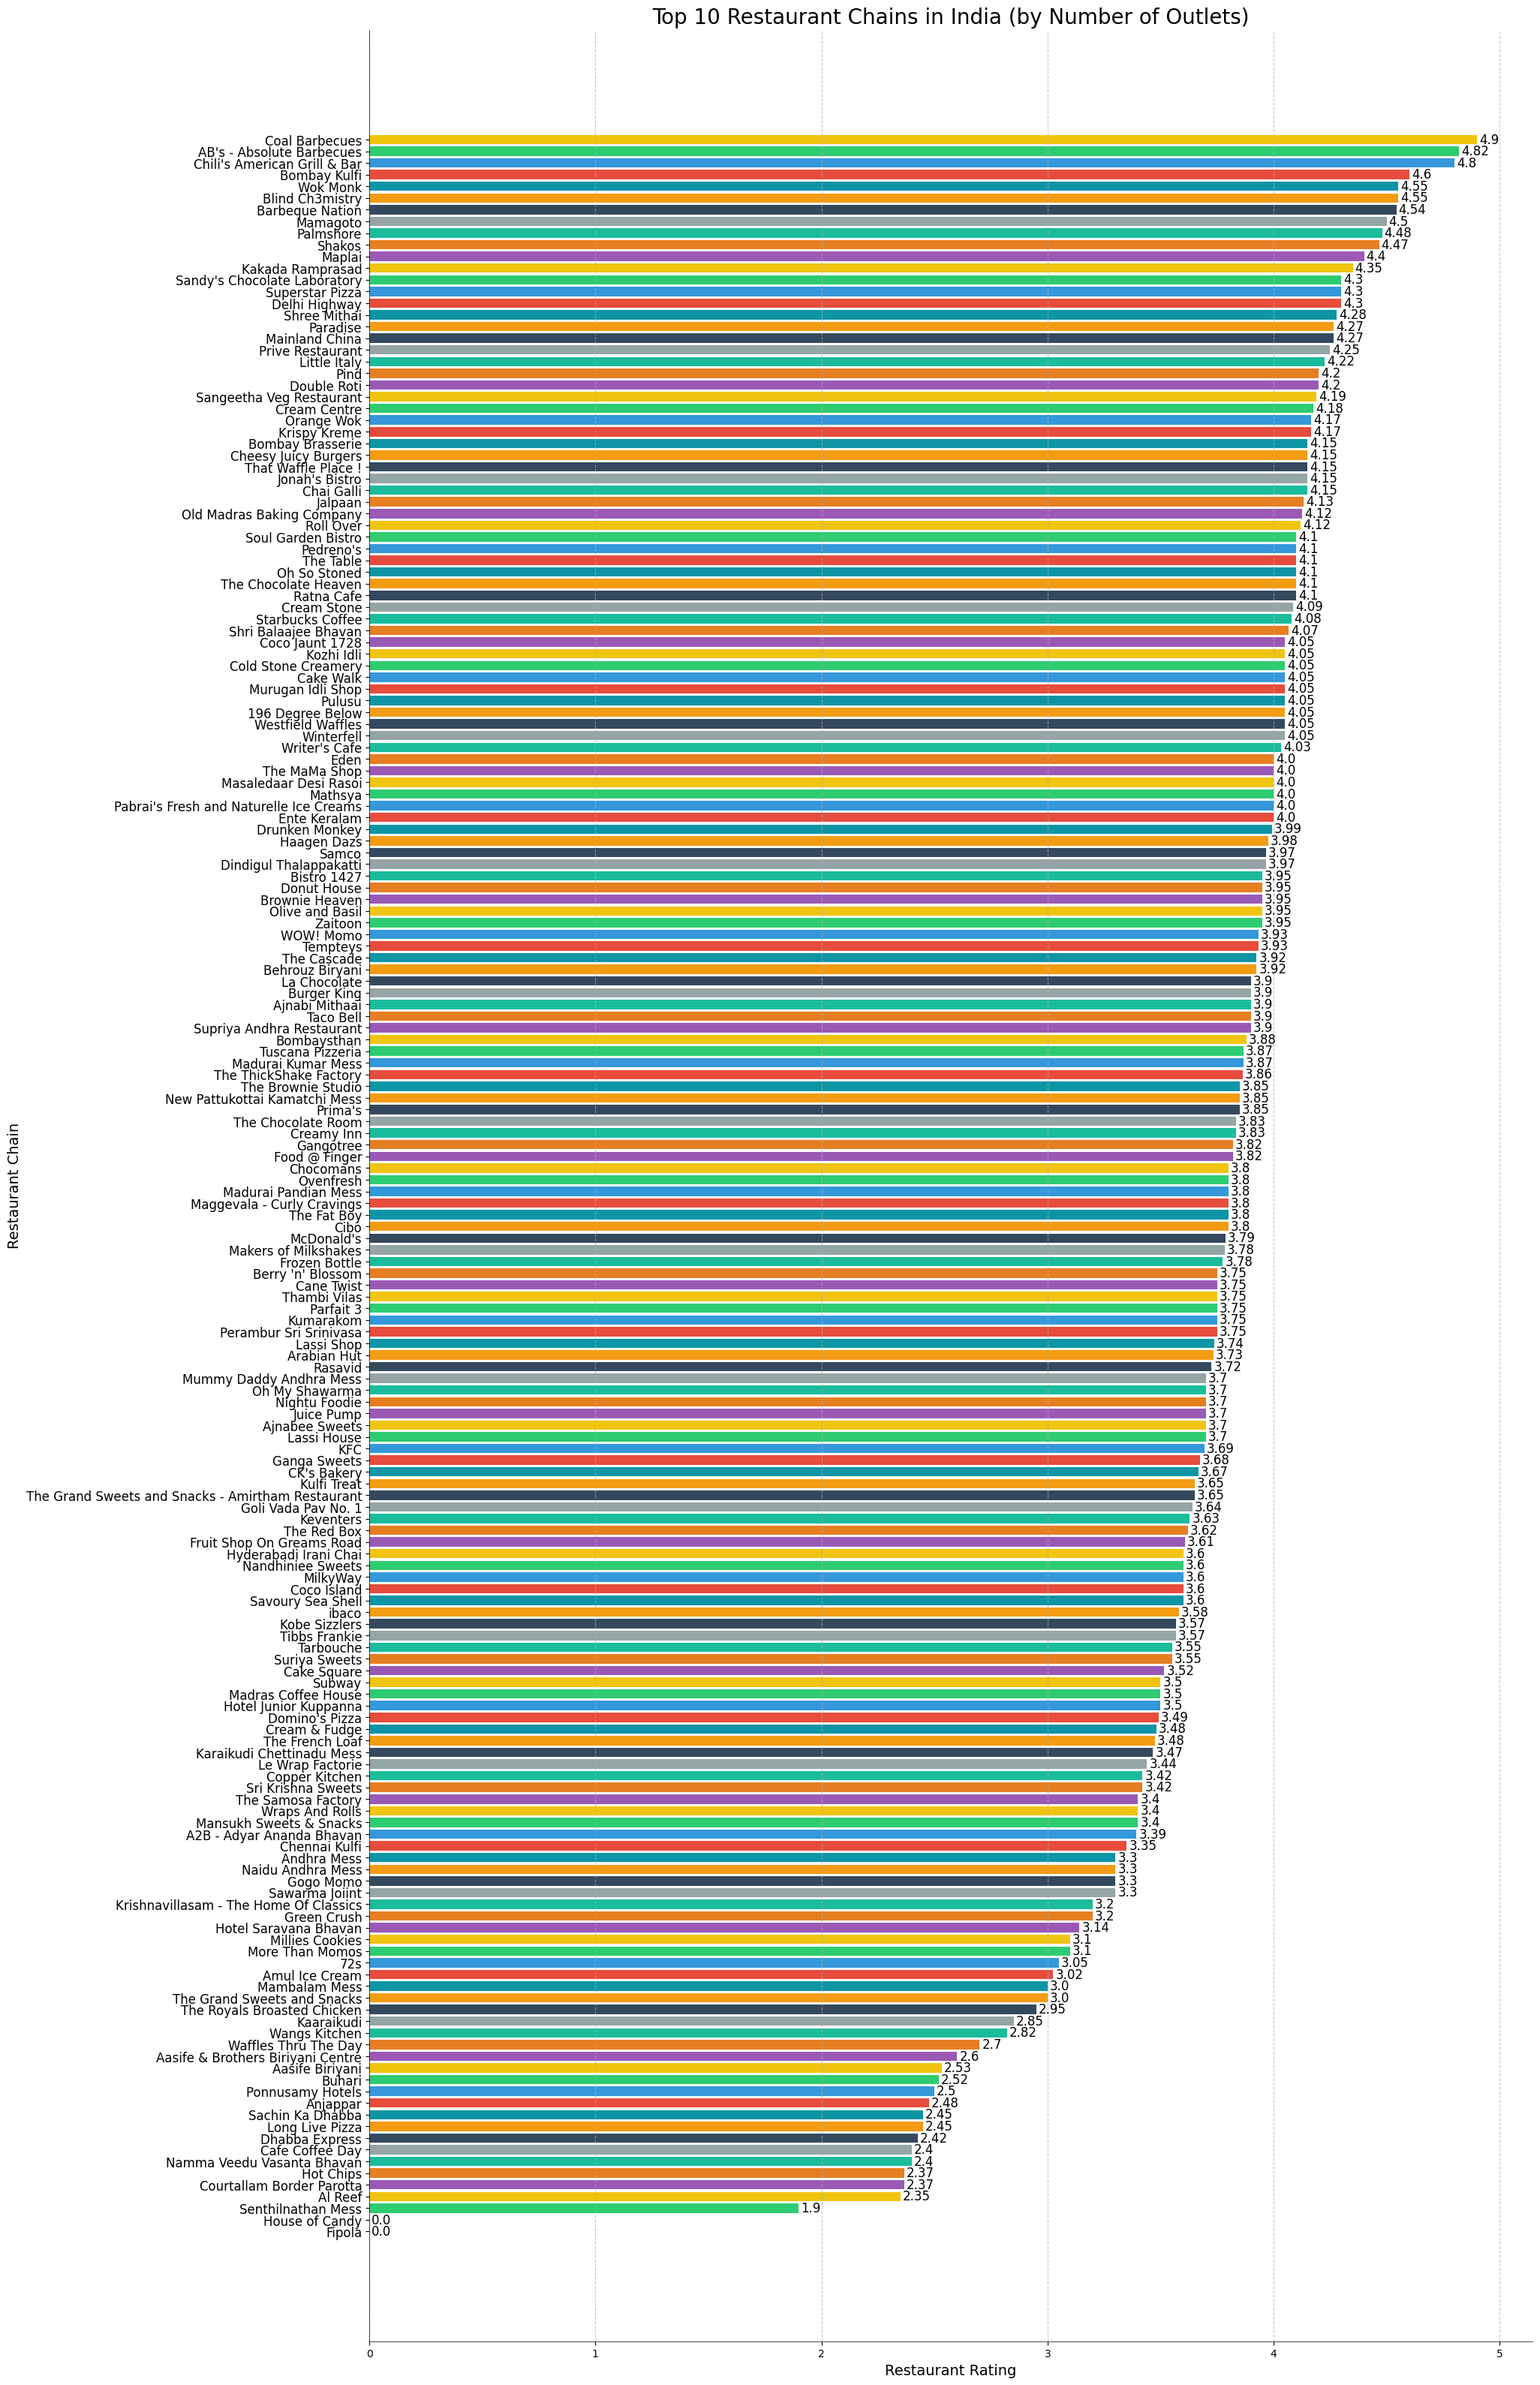

In [208]:
# Get the top restaurant chains by number of outlets

# Define the colors for the bars
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f1c40f', '#9b59b6', '#e67e22', '#1abc9c', '#95a5a6', '#34495e', '#f39c12','#0D95A5']

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=[20,40])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

bars = ax.barh(restaurant_ratings.index, restaurant_ratings.values, color=colors)

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() +0.01, bar.get_y() + bar.get_height() / 2, restaurant_ratings.values[i].round(2), ha='left', va='center', fontsize=12)

# Set the x-axis label
ax.set_xlabel('Restaurant Rating', fontsize=14)

# Set the y-axis label and tick labels
ax.set_ylabel('Restaurant Chain', fontsize=14)
ax.set_yticklabels(restaurant_ratings.index, fontsize=12)

# Set the title
ax.set_title('Top 10 Restaurant Chains in India (by Number of Outlets)', fontsize=20)

# Add a grid
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

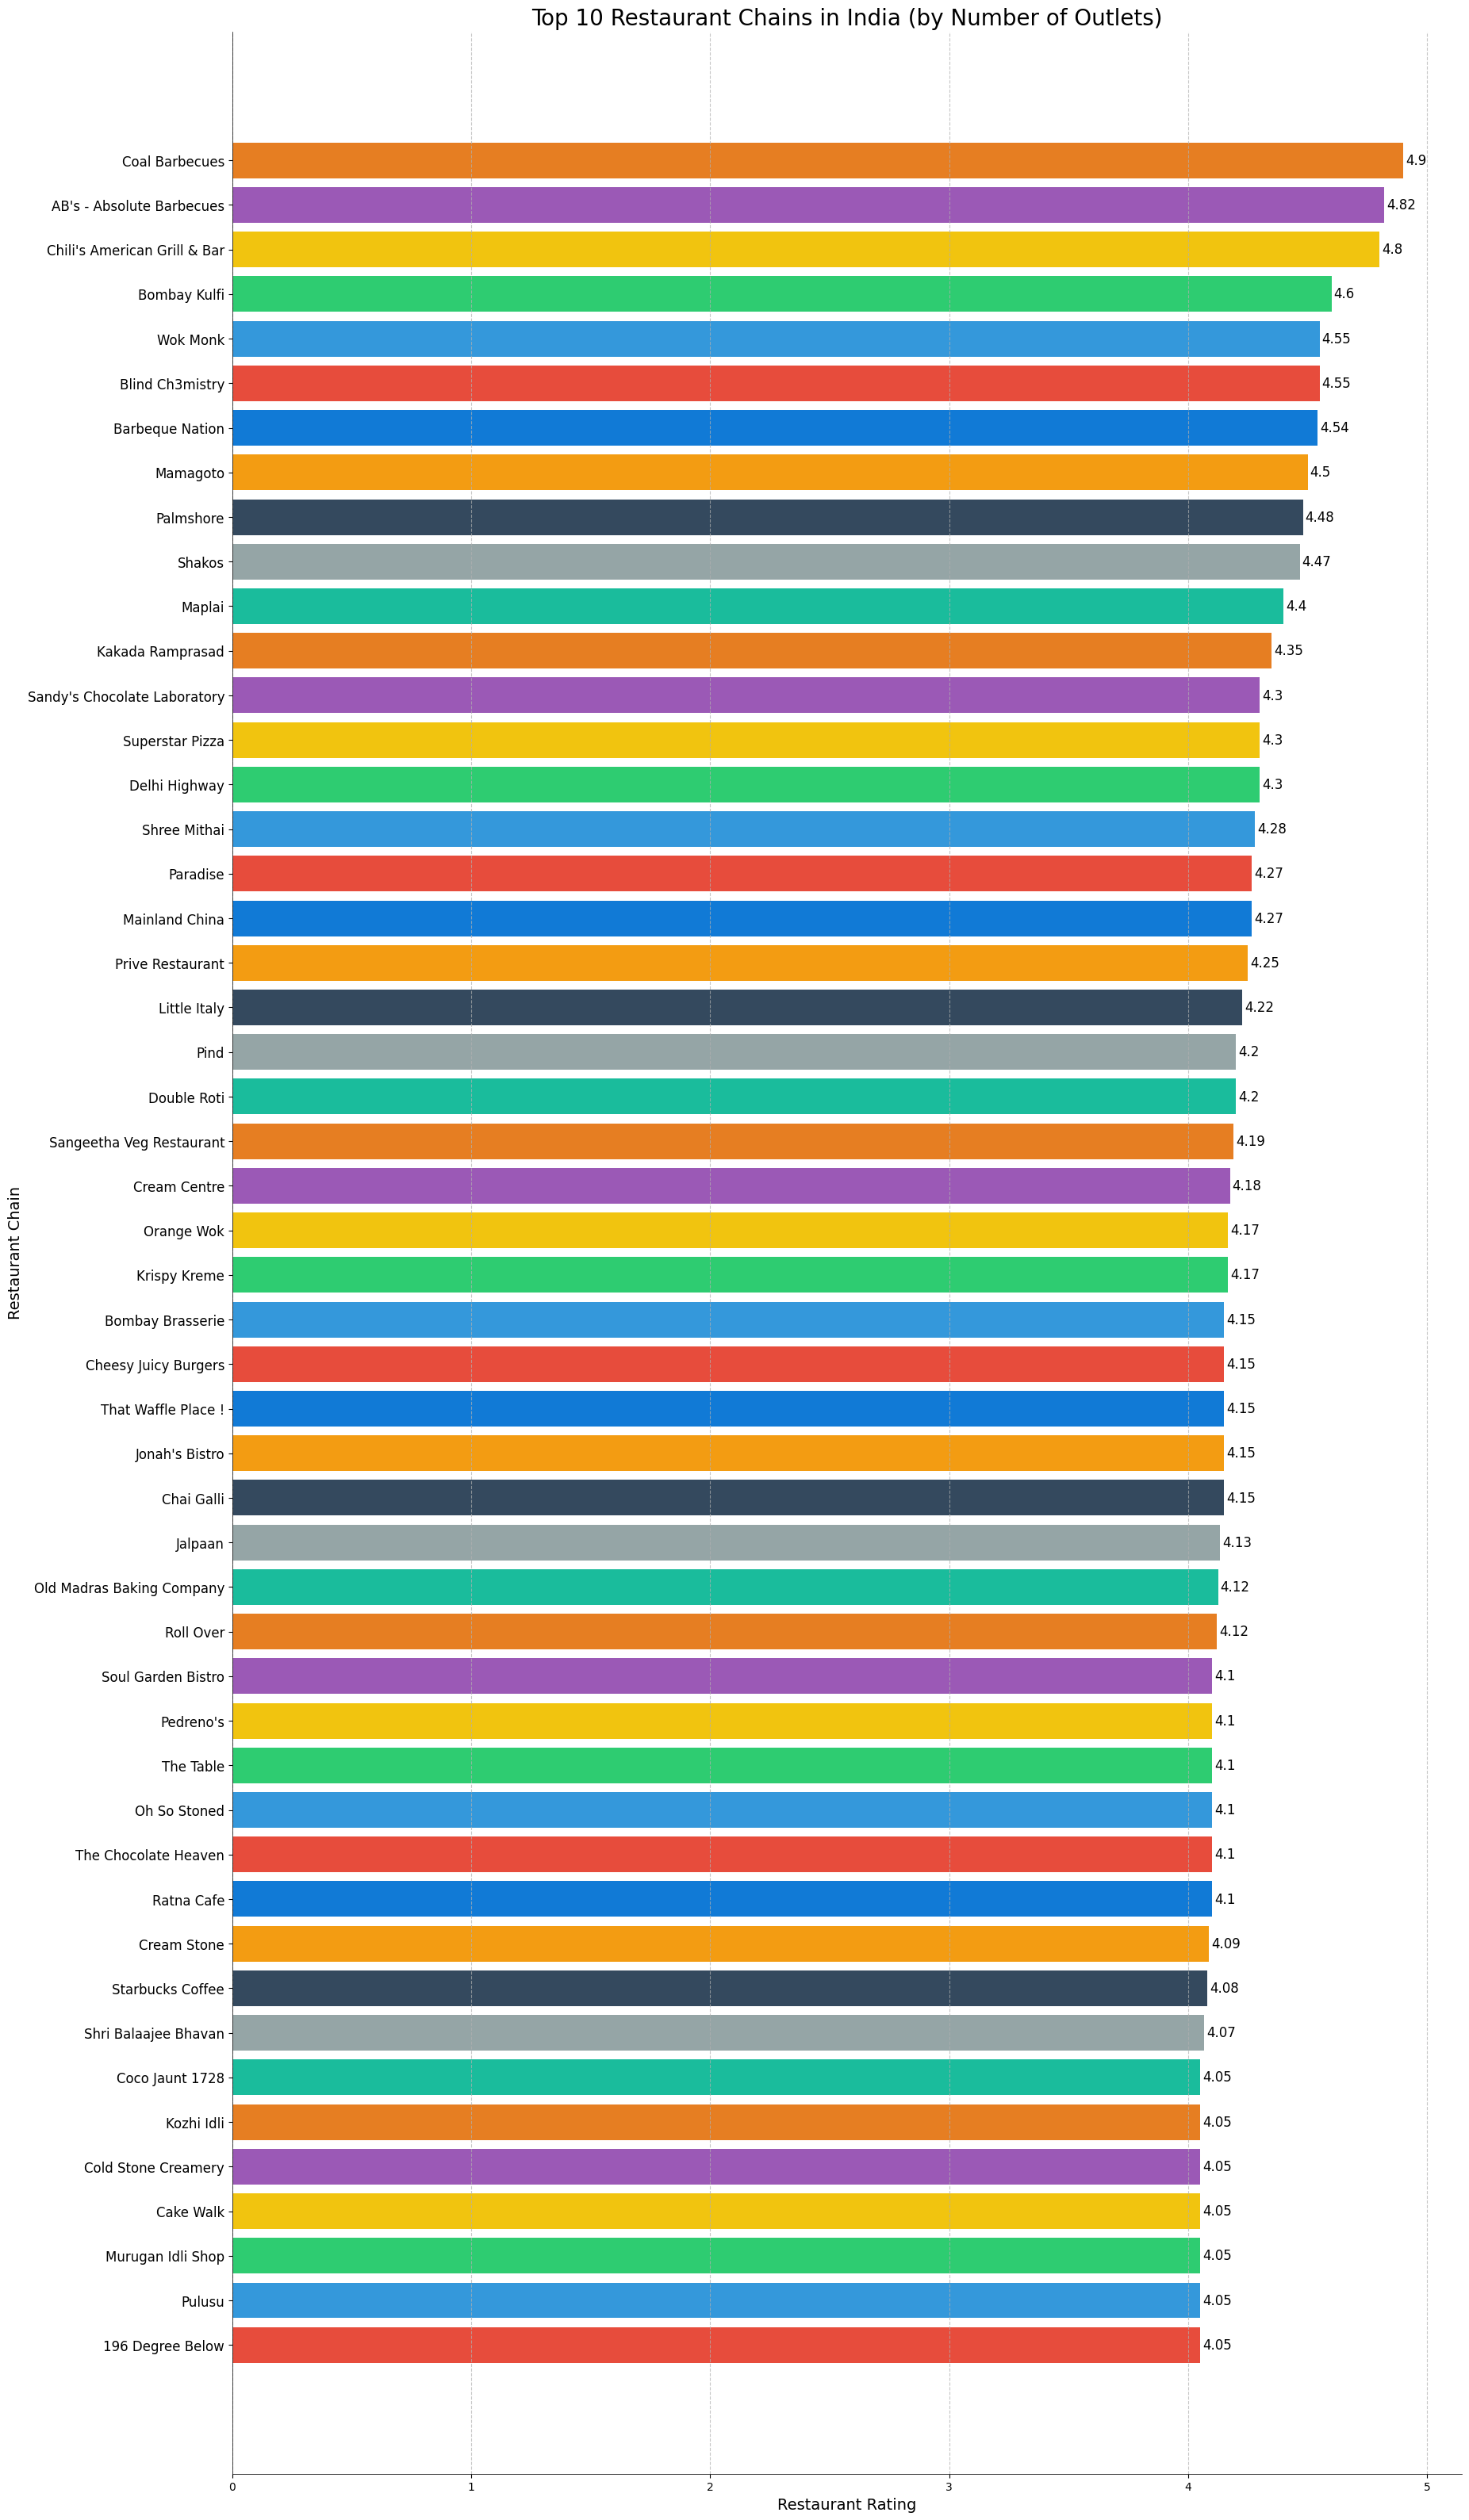

In [209]:
# Get the top 50 restaurant chains by number of outlets
temp=restaurant_ratings[130:180]
# Define the colors for the bars
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f1c40f', '#9b59b6', '#e67e22', '#1abc9c', '#95a5a6', '#34495e', '#f39c12','#117AD6']

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=[20,40])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

bars = ax.barh(temp.index, temp.values, color=colors)

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() +0.01, bar.get_y() + bar.get_height() / 2, temp.values[i].round(2), ha='left', va='center', fontsize=12)

# Set the x-axis label
ax.set_xlabel('Restaurant Rating', fontsize=14)

# Set the y-axis label and tick labels
ax.set_ylabel('Restaurant Chain', fontsize=14)
ax.set_yticklabels(temp.index, fontsize=12)

# Set the title
ax.set_title('Top 10 Restaurant Chains in India (by Number of Outlets)', fontsize=20)

# Add a grid
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

This chart is majorly dominaed by big fast food chains

In [210]:
# ratings for single restaurants
restaurant_ratings1 = c_filtered1.groupby("name")["aggregate_rating"].mean().sort_values(ascending=True)

# Print the top 100 restaurants with the highest average rating
print(round(restaurant_ratings1,2).nlargest(100))


name
Bhangra                                         4.9
Onesta                                          4.9
J.Hind - Grand by GRT Hotels                    4.8
Bombay Lassi                                    4.8
Momo Sa-Khang by Kailash Kitchen                4.8
                                               ... 
Fabelle Chocolate Boutique - ITC Grand Chola    4.4
Yaa Mohaideen Biryani                           4.4
The Velveteen Rabbit                            4.4
Kalathi Rose Milk Shop                          4.4
Joker's Kitchen                                 4.4
Name: aggregate_rating, Length: 100, dtype: float64


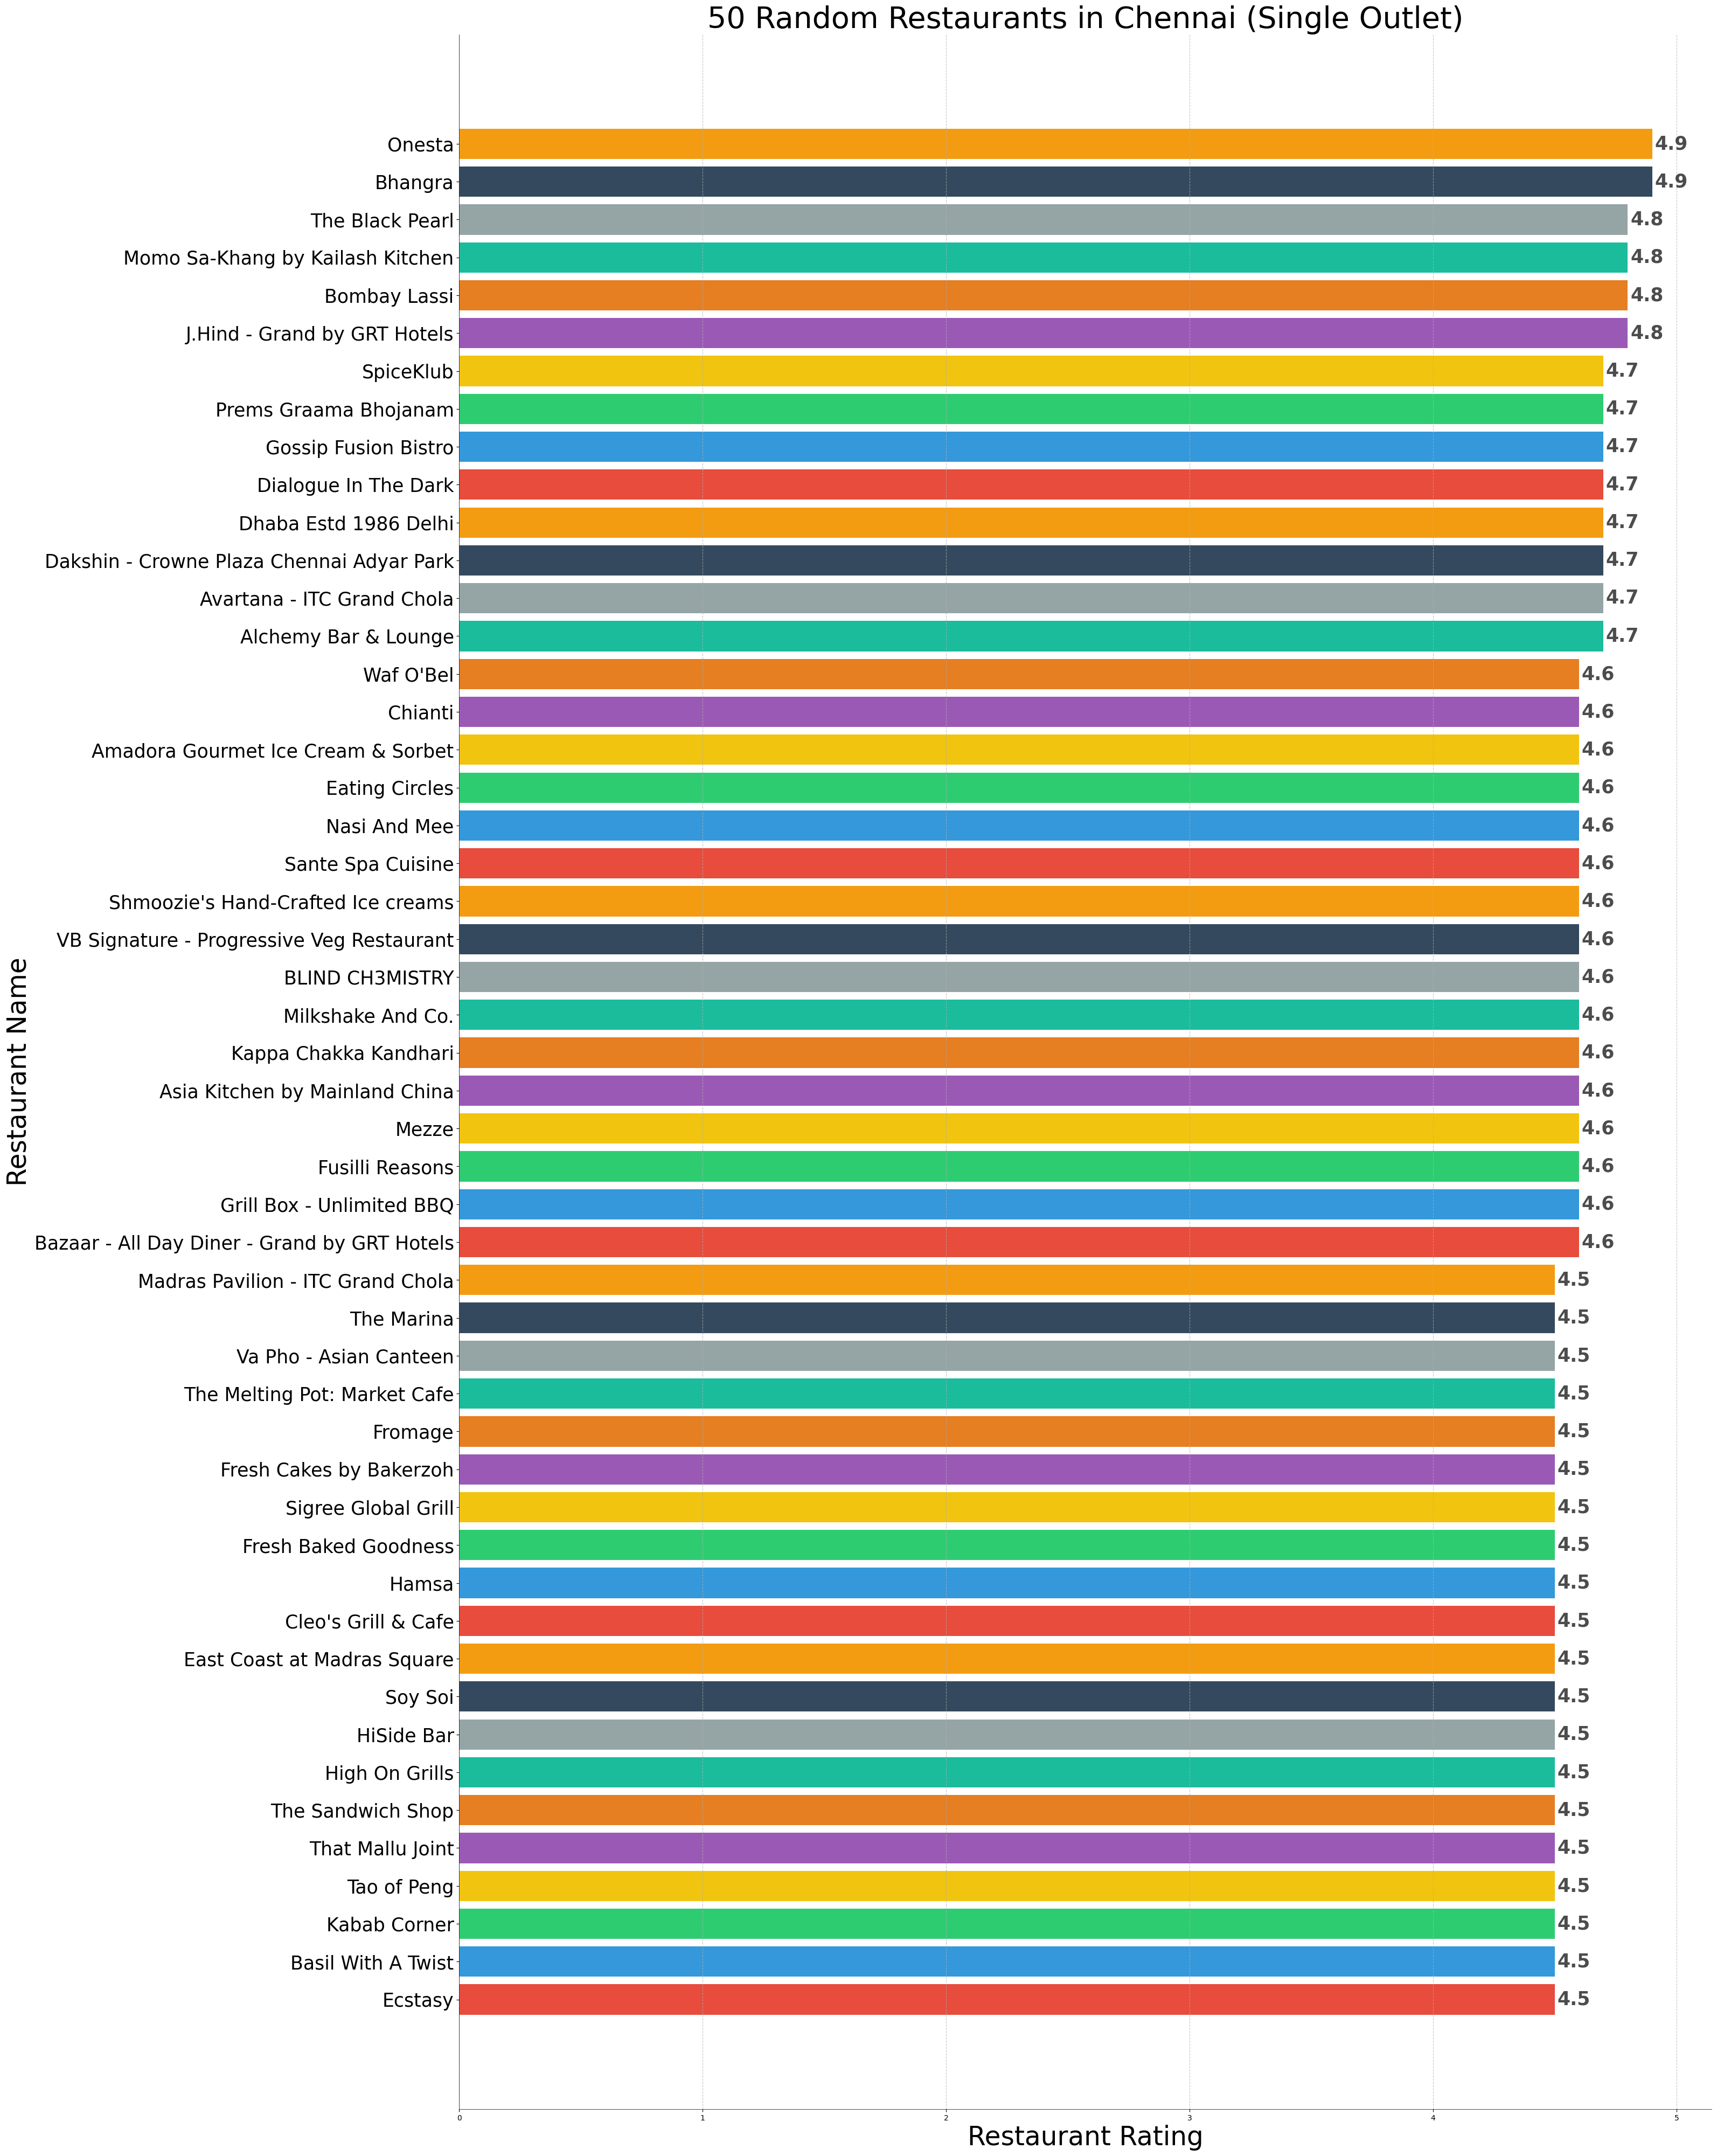

In [211]:
# Get top 50 restaurants by ratings with single outlet
temp1=restaurant_ratings1[1041:1091]

# Define the colors for the bars
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f1c40f', '#9b59b6', '#e67e22', '#1abc9c', '#95a5a6', '#34495e', '#f39c12']

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=[30,50])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

bars = ax.barh(temp1.index, temp1.values, color=colors)

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() +0.01, bar.get_y() + bar.get_height() / 2, temp1.values[i].round(2), ha='left', va='center', fontsize=25, alpha=0.7,fontweight='bold', color='black')

# Set the x-axis label
ax.set_xlabel('Restaurant Rating', fontsize=35)

# Set the y-axis label and tick labels
ax.set_ylabel('Restaurant Name', fontsize=35)
ax.set_yticklabels(temp1.index, fontsize=25)

# Set the title
ax.set_title('50 Random Restaurants in Chennai (Single Outlet)', fontsize=40)

# Add a grid
ax.grid(axis='x', linestyle='--', alpha=0.7)


# Show the plot
plt.show()

The restaurants with only single outlet have a high rating 

#### Number of restaurants (by city)

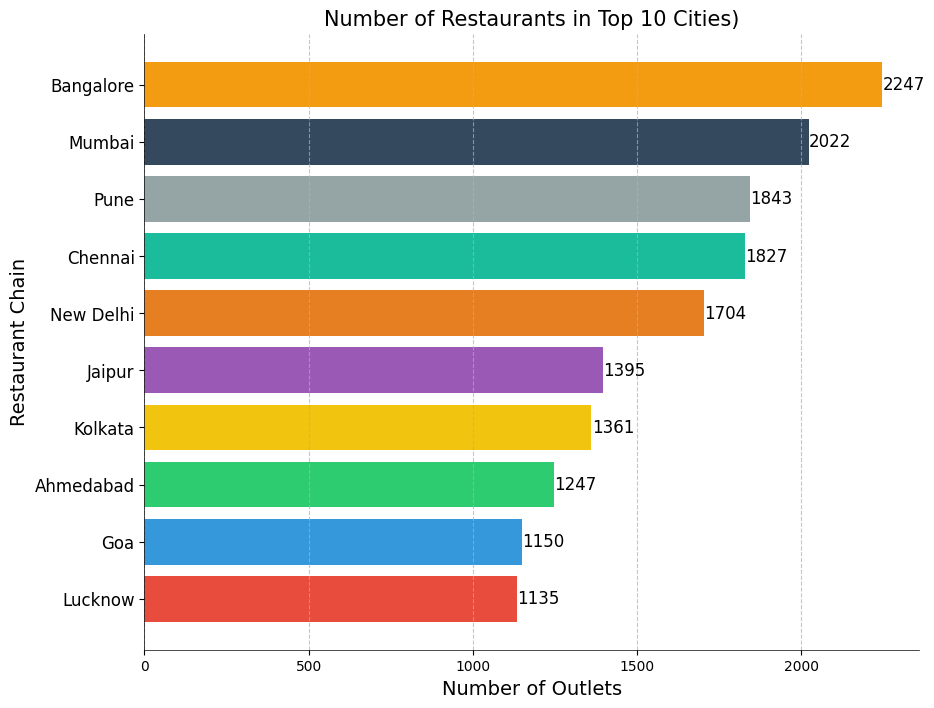

In [234]:
city_counts = n.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=[10,8])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f1c40f', '#9b59b6', '#e67e22', '#1abc9c', '#95a5a6', '#34495e', '#f39c12']

bars = ax.barh(city_counts.index, city_counts.values, color=colors)

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, city_counts.values[i], ha='left', va='center', fontsize=12)

# Set the x-axis label
ax.set_xlabel('Number of Outlets', fontsize=14)

# Set the y-axis label and tick labels
ax.set_ylabel('Restaurant Chain', fontsize=14)
ax.set_yticklabels(city_counts.index, fontsize=12)

# Set the title
ax.set_title('Number of Restaurants in Top 10 Cities)', fontsize=15)

# Add a grid
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

South India dominated the Top 4 with more restaurants than in other cities.


## Highlights wordcloud
a wordcloud is created with top 100 highlights

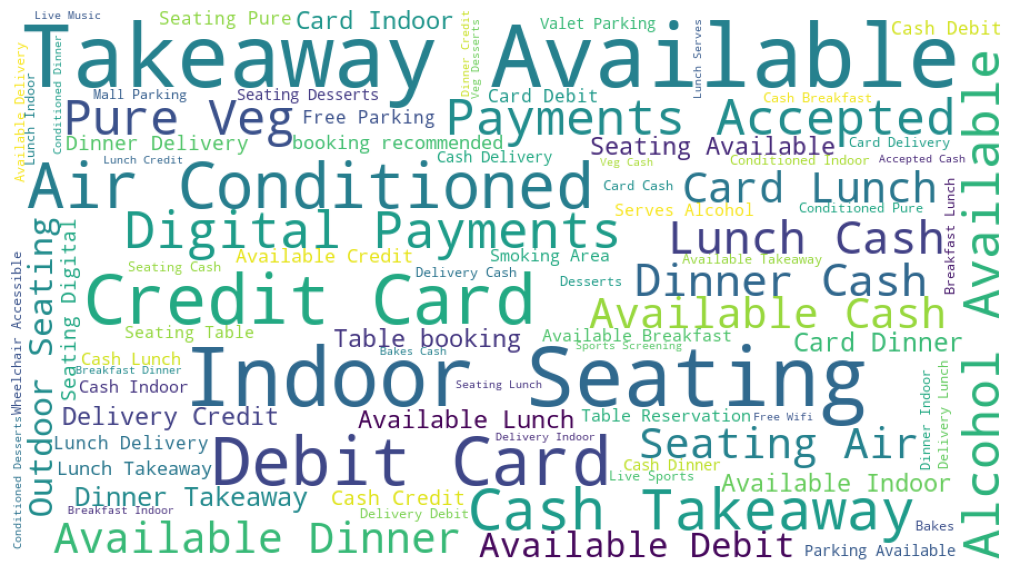

In [237]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 900, height = 500, 
                background_color ='white', 
                min_font_size = 10, max_words=100).generate(hl_str) 
                         
plt.figure(figsize = (10, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## Results and significance

- With a market size of approximately $4 billion, the restaurant industry in India is one of the fastest-growing sectors. As a result, there is a significant amount of data available to analyze the trends and patterns within this industry. In order to gain a better understanding of India's restaurant industry, we looked at a dataset containing information on more than 55,000 restaurants.

- Preprocessing, exploratory data analysis, and a variety of visualizations have all been used in our comprehensive data analysis of the dataset. To determine the significance of the findings, we have also carried out statistical analysis. In general, the analysis provides useful information about the Indian restaurant industry, including popular cuisines, foodie neighborhoods, and cities with the most restaurants. Stakeholders in the restaurant industry may benefit from the analysis in order to improve their business strategies and make data-driven decisions.

- Importing the necessary libraries and performing data preprocessing, including data cleaning and handling missing values, were the first steps in the analysis. The data were transformed into a format suitable for analysis and duplicates were removed. Exploratory data analysis (EDA) was conducted to gain insights into the dataset, including the distribution of restaurants across cities, cuisines, and the popularity of different types of restaurants.
One of the first insights we gained was that vegetarian restaurants are very popular in India, with over 30% of the restaurants in the dataset being vegetarian. We also discovered that the majority of restaurants had ratings between 3.5 and 4.5, with a significant upward bias in the distribution of ratings.

- After that, we looked at the dataset's most popular cuisines and discovered that North Indian and Chinese cuisine were the most popular, followed by South Indian and fast food cuisine. We also identified Pune, Mumbai, and Bangalore as the three best foodie destinations in India.

- We then examined the top ten cities with the most restaurant establishments, with Delhi, Mumbai, and Bangalore having the most establishments. Based on the number of ratings, we also looked at how restaurant ratings were distributed. We found that restaurants with more number ratings generally had higher ratings.

- We then looked at the average restaurant ratings by city, and found that Bangalore had the highest average rating, followed by Pune and Chennai. We also identified the cuisines that were most common in the cities with the lowest average restaurant ratings, with Chinese and Fast Food being the most common.

- We looked at the cities with the most restaurants in addition to evaluating ratings for restaurants. Bangalore had the most restaurants per capita, followed by Mumbai and Pune, which had the most.

- Then, we concentrated on the areas of Chennai with the most restaurants, and we discovered that Velachery, Adyar, and Nungambakkam were the top three. We also looked at how prices vary between different kinds of restaurants and how this affects how satisfied customers are with them. We found that there was a weak negative correlation between price and how satisfied customers are with them.

- Finally, we used the folium library to plot the locations of restaurants with single outlet and more than one outlet on a map of India. We found that most of the restaurants with more than one outlet were concentrated in the major cities, with Bangalore, Mumbai having the most restaurants with multiple outlets.

- The WordCloud function from the wordcloud library is used to create the word cloud. This function accepts a number of parameters, including the image's width and height, the color of the background, the minimum font size, and the maximum number of words that can be included in the cloud.

- The WordCloud function is called with these parameters and the text string hl_str generated from the list hl. The resulting word cloud image is then displayed using plt.imshow(). Finally, plt.show() is called to display the image.

- Overall, our analysis provides a comprehensive overview of the Indian restaurant industry and draws attention to a number of significant patterns and trends. Restaurant owners, industry analysts, and policymakers can use the insights gleaned from this analysis to make better decisions and drive India's restaurant industry's expansion.
